# CCAI 323 Machine Learning Project

-------------------------------------------------------------------------





# prepared by :

> **Section: A2/A2L**

> **Name: Afnan Tariq Algogandi,        ID: 2007926**

> **Name: Layal Saud Halwani,           ID: 2007896**

# Libraries :

In [1]:
# import Libraries

import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import random
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from matplotlib import cm
import math
from scipy.spatial import distance

# -------------------------------------

from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering

# -------------------------------------

from sklearn.metrics import f1_score
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import rand_score

# 1. Clusting Algorithms

> # 1.1 - K-Mean algorithm from scratch

In [2]:
# Euclidean distance : distances between the items and the centroid
def euclidean(x, centroid):
    return np.sqrt(np.power((centroid[0]- x[0]),2) + np.power((centroid[1]-x[1]),2) )

In [3]:
# initialize the Centroids randomly
def initializeCentroids(k,X):
    
    centroids = np.array([])
    minx, maxx = np.min(X, axis=0),np.max(X, axis=0) #take the range of the data
    
    for i in range(k):
        #take 2 random valuse in the range of the data for each cluster
        initncentroid = np.random.uniform(minx, maxx, size=2) 
        centroids = np.append(centroids,initncentroid,axis=0) #store the centroid
        
    return np.reshape(centroids,[k,2]) # reshape the array

In [4]:
#plot the clusters 
def plotCluster(X,y,centroids,k):
    
    # to plot the centroids in different colors
    c_ = np.arange(start=1, stop=k+1, step=1)
    
    plt.scatter(X[:,0], X[:,1],c=y ,s=40, cmap=cm.colors.ListedColormap(colorsClusters))
    plt.scatter(centroids[:,0], centroids[:,1],c=c_ ,marker='x',s=60,cmap=cm.colors.ListedColormap(colorsClusters))
    plt.xlabel("X")
    plt.ylabel("y")
    plt.show()

In [5]:
#plot the Centroid 
def plotCentroid(X,y,centroids,k):
    
    # to plot the centroids in different colors
    c_ = np.arange(start=1, stop=k+1, step=1)
    
    plt.scatter(X[:,0], X[:,1],c=y ,s=40, cmap=cm.colors.ListedColormap(colorsClusters))
    plt.scatter(centroids[:,0], centroids[:,1],c=c_ , marker='x',s=60,cmap=cm.colors.ListedColormap(colorsCentroid))
    plt.xlabel("X")
    plt.ylabel("y")
    plt.show()

In [6]:
# create the distance Matrix : 
# calculate the distance between each point and each centroid
def distanceMatrix(X,centroids):
    
    disMatrix = np.array([])
    
    # calculate the distances
    for i in range(len(X)): # each elemant
        for j in range(len(centroids)): # each centroid
            dis = euclidean(X[i], centroids[j]) # compute the distance
            disMatrix = np.append(disMatrix,dis) # store the distance
            
    return np.reshape(disMatrix,[len(X),k]) # reshape the array

In [7]:
# Assign every item to its nearest cluster centroid
def ClusterAssign(disMatrix):
    
    Clusters = np.array([])
    
    #get the nearest cluster centroid from the distance Matrix
    for i in range(len(disMatrix)):
        minimum = disMatrix[i][0] #first centroid distance
        c = 0 
        for j in range(k):
            # take the minmum distance
             if minimum > disMatrix[i][j]: 
                minimum = disMatrix[i][j]
                c = j
        Clusters = np.append(Clusters,c) #store the labels of the data
        
    return Clusters

In [8]:
# compute the mean of the cluster
def updateCentroid(cluster):
    
    # the number of the data in the cluster
    l = len(cluster)
    
    sum_ = 0
    
    # summation the data in the cluster
    for i in range(l):
        sum_ = sum_ + cluster[i]
        
    
    if (l == 0):
        print("\nImportant : In some clusters, there are no assigned points.")
        print("\"ZeroDivisionError: division by zero\" : This erorr happen beacuse the number of the point in the cluser = 0 , when calculating the mean to update the centroid")
        print("This happens because of the poor choice of initial centroids which lead to a poor clustering")
        print("To solve this, please run the algorithm multiple times. until you get good results\n\n")
        # Divide the summation by the linght
        return sum_/l
        
    else:
        # Divide the summation by the linght
        return sum_/l

In [9]:
# Recompute the centroids of the clusters based on the new cluster assignments
def Centroid(X,k,clusters):
    
    upCen = np.array([])
    clusters = clusters.astype(int)
    
    # k number of cluster
    for i in range (k):
        Clus = np.array([])
        for j in range (len(X)):
            # if the element in the cluster of centroid k
            if(clusters[j] == i):
                Clus = np.append(Clus,X[j])
        
        # the size of the cluster
        size = int(len(Clus)/2)
        # reshape the array
        Clus = np.reshape(Clus,[size,2])
        # calculate the mean
        cent = updateCentroid(Clus)
        # store the cinroids in an array  
        upCen = np.append(upCen,cent) 
        
    return np.reshape(upCen,[k,2]) # reshape the array

In [10]:
# add the labels to the data in the same array
# easear in the plot
def labelTheData(X , clusters):
    labels = np.reshape(clusters,[len(X),1]) # reshape the array
    labels = np.concatenate([X, labels], axis=1) # marge the data array with labels 
    return labels

In [11]:
# to stop when there is no performe any more
def notequal(Cluster,pre):
    c = (pre == Cluster) # array to compare the cluster with the previous cluster
    if c.all() != True : # if there is an difference 
        return True 

In [12]:
def KMeans(X,y,k):
    
    t = 10 # number of iterations
    iteration = 1
    con = True # stop condation
    
    prevClusters = np.zeros(300) # initialize the previous centroid
    
    # to plot the centroids in different colors
    c_ = np.arange(start=1, stop=k+1, step=1)
    
    # initialize the centroids randomly
    centroids = initializeCentroids(k,X)
    
    # plot the initial centroids 
    print("\ninitialize the centroids randomly:\n",centroids,"\n")
    plt.scatter(X[:,0], X[:,1],s=40, color = 'lightgray')
    plt.scatter(centroids[:,0], centroids[:,1],c=c_ ,marker='x',s=60,cmap=cm.colors.ListedColormap(colorsCentroid))
    plt.xlabel("X")
    plt.ylabel("y")
    plt.show()

    # compute the distance Matrix
    disMatrix = distanceMatrix(X,centroids)
    
    # assign (labels) the data to the clusters 
    clusters = ClusterAssign(disMatrix)
    
    # marge the data with their labels
    labels = labelTheData(X , clusters)
    
    # plot the clusters
    print("\nassign point to the clusters :\n")
    plotCluster(X,clusters,centroids,k)
    
    # run until convarge
    while con and iteration < t:
        
        print("Number of iteration:", iteration)
        prevClusters = clusters # store the previous cluster
        
        # update the centroids of the clusters
        centroids = Centroid(X,k,clusters)
        
        # plot the updated centroid
        print("\nupdate the centroid :\n")
        plotCentroid(X,clusters,centroids,k)
        
        # compute the distance Matrix
        disMatrix = distanceMatrix(X,centroids)
        
        # assign (labels) the data to the clusters 
        clusters = ClusterAssign(disMatrix)
        
        # marge the data with their labels
        labels = labelTheData(X , clusters)
        
        # plot the clusters
        print("\nassign point to the clusters :\n")
        plotCluster(X,clusters,centroids,k)
        
        # stop condition
        con = notequal(clusters,prevClusters)
        iteration = iteration + 1
        
    print("\nfinal result:\n")
    plt.title('Clustered Data using K-Mean')
    plotCluster(X,clusters,centroids,k)
    
    return clusters

> # 1.2 - DBSCAN algorithm from scratch

In [13]:
def my_DBSCAN(eps, minPts, df):
    
    #initiating cluster number 
    num_C = 0
    
    temp_stack = set()
    unvisited = list(df.index)
    clusters = []
    
    
    while (unvisited): #run until all points have been visited

        #initilaiz classification of points
        first_point = True
        iscore = False
        isborder = False
        isnoise = False
        
        #choose a random unvisited point
        temp_stack.add(random.choice(unvisited))
        
        while (temp_stack): #run until a all points of cluster is identify 
            
            #pop current point from stack
            index = temp_stack.pop()
            
            #get points from given index
            x, y = df.iloc[index]['X']  ,  df.iloc[index]['Y']

            #check available points within radius
            #available =  df[((x - df['X'])**2 <= eps) & ((y - df['Y'])**2 <= eps) & (df.index != index)]
            available = df[((np.abs(x - df['X']) <= eps) & (np.abs(y - df['Y']) <= eps)) & (df.index != index)]
            neigh_indexes = available.index
            
            # identify_point
            if len(available) >= minPts:
                iscore = True

            elif (len(available) < minPts) and len(available) > 0:
                isborder = True

            elif len(available) == 0:
                isnoise = True 

                
            unvisited.remove(index) #remove point from unvisited list
            
            neigh_indexes = set(neigh_indexes) & set(unvisited) #look at only unvisited points
            
            
            if iscore: 
                first_point = False
                
                clusters.append((index,num_C)) #assign to a cluster
                temp_stack.update(neigh_indexes) #add neighbours to a stack

            elif isborder:
                clusters.append((index,num_C))
                
                continue

            elif isnoise: 
                clusters.append((index, -1))
                
                continue
          
        
        if not first_point:
          if num_C <= 2:
            #increment cluster number
            num_C+=1
          else:
            num_C = -1
        
    return clusters

> # 1.3 -  Hierarchical clustering algorithm from sklearn Libraries

> # 1.4 - GMM algorithm from sklearn Libraries

# 2. Datasets :

> # prepare the data

In [14]:
n_samples = 300
random_state = 58 # (2+0+0+7+9+2+6) + (2+0+0+7+8+9+6)

In [15]:
# colors of the centroids
colorsCentroid = ['palevioletred','steelblue','mediumpurple']

# colors of the clusters
colorsClusters = ['mistyrose','skyblue','thistle']

# Dataset1: Blobs dataset

Text(0, 0.5, 'y')

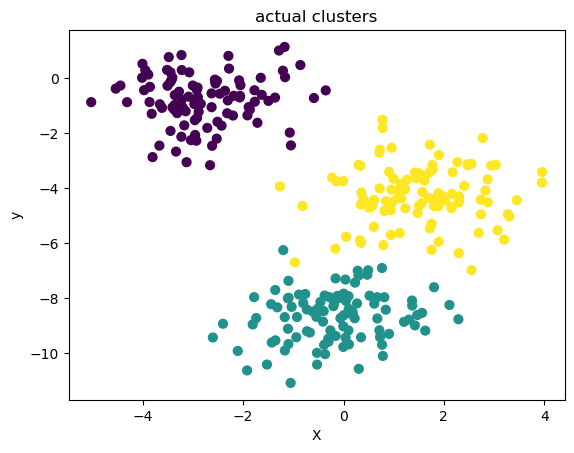

In [16]:
X_blobs,y_blobs = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
# plot The correct cluster of data
plt.scatter(X_blobs[:,0], X_blobs[:,1], c=y_blobs,s=40)
plt.title('actual clusters')
plt.xlabel("X")
plt.ylabel("y")

In [17]:
# Number of clusters
k = 3

# actual Cluster 
y_d1 = y_blobs

> # 1. K-mean


initialize the centroids randomly:
 [[ 3.10545912 -0.72874374]
 [ 0.66231561 -9.56764353]
 [-4.63206912 -7.99615894]] 



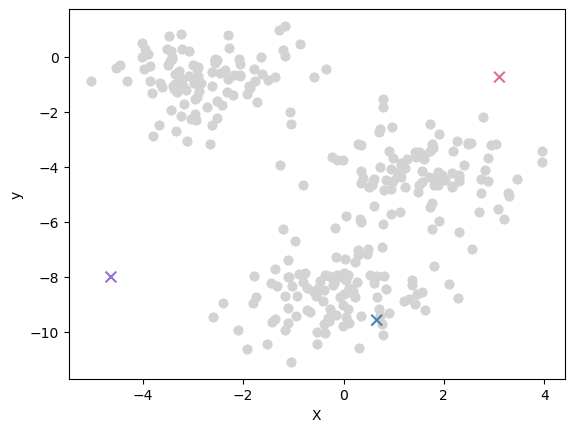


assign point to the clusters :



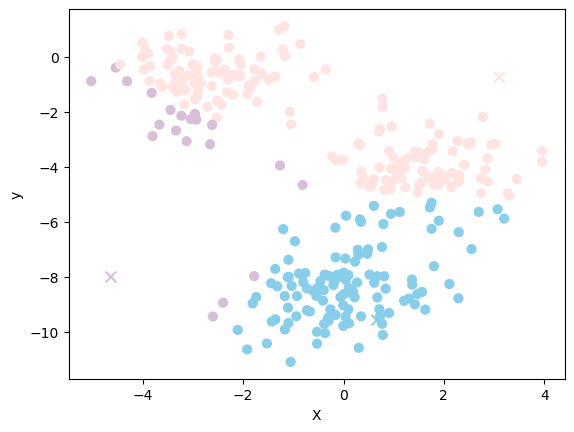

Number of iteration: 1

update the centroid :



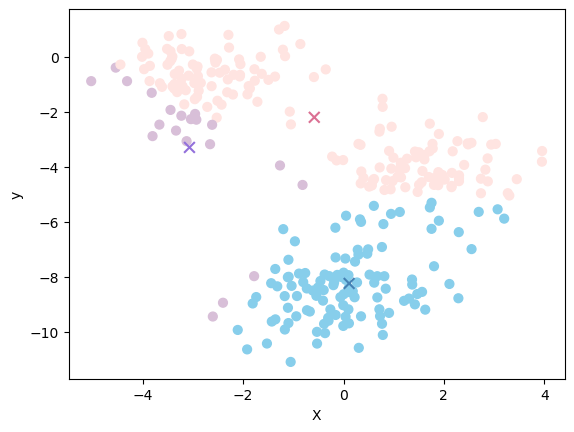


assign point to the clusters :



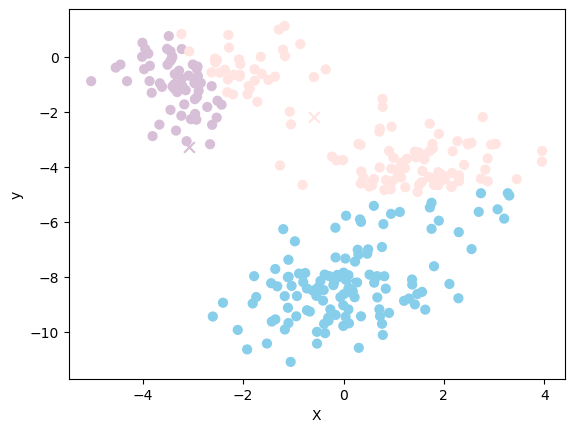

Number of iteration: 2

update the centroid :



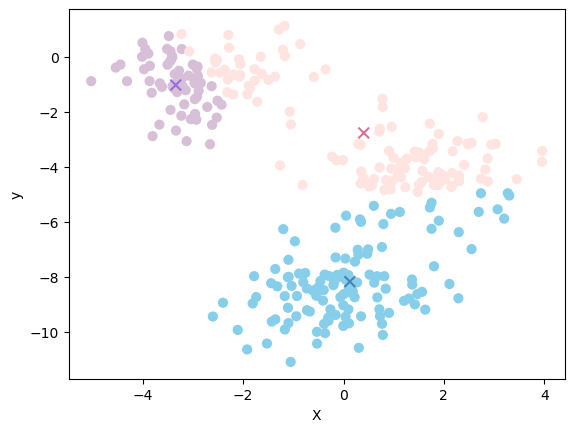


assign point to the clusters :



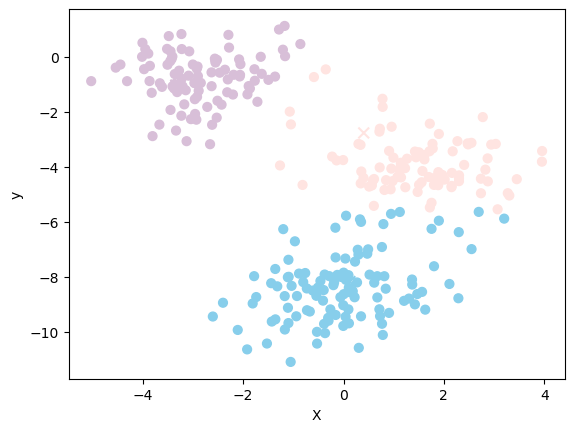

Number of iteration: 3

update the centroid :



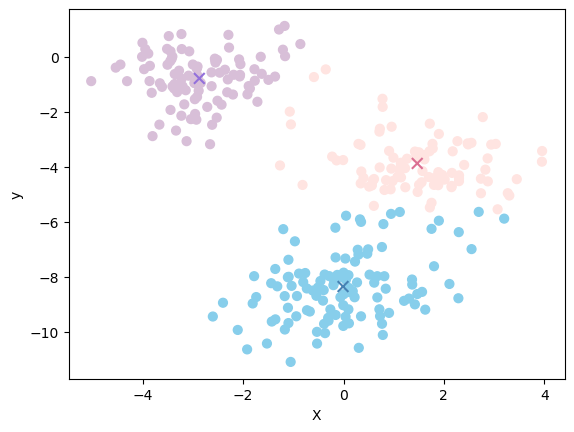


assign point to the clusters :



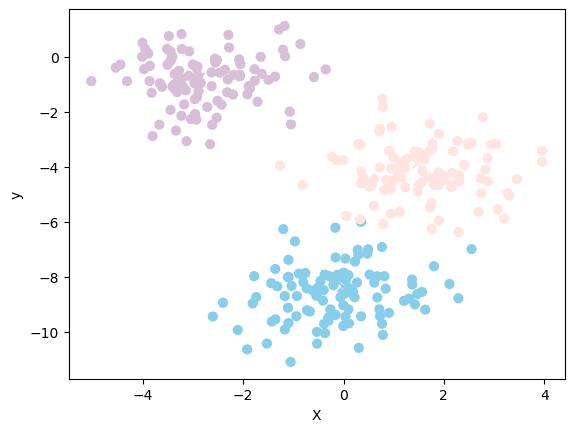

Number of iteration: 4

update the centroid :



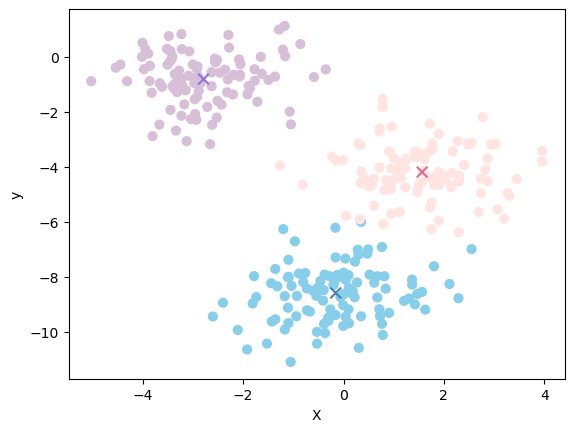


assign point to the clusters :



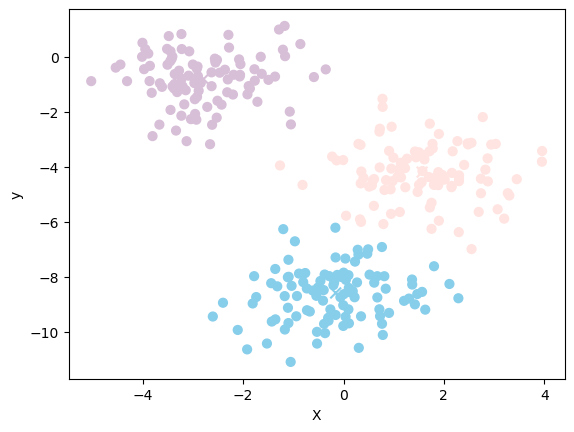

Number of iteration: 5

update the centroid :



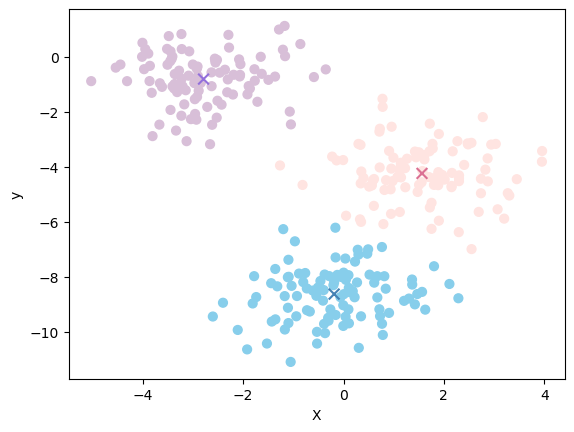


assign point to the clusters :



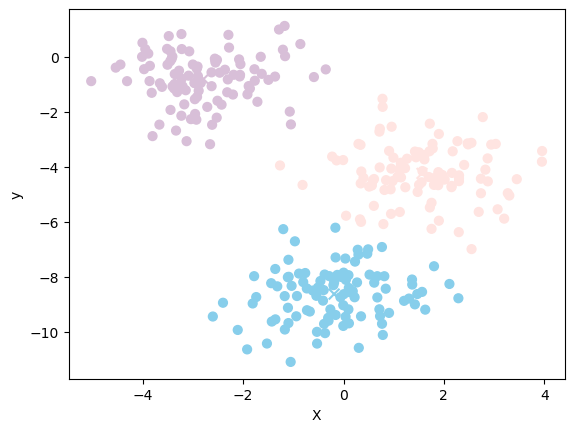


final result:



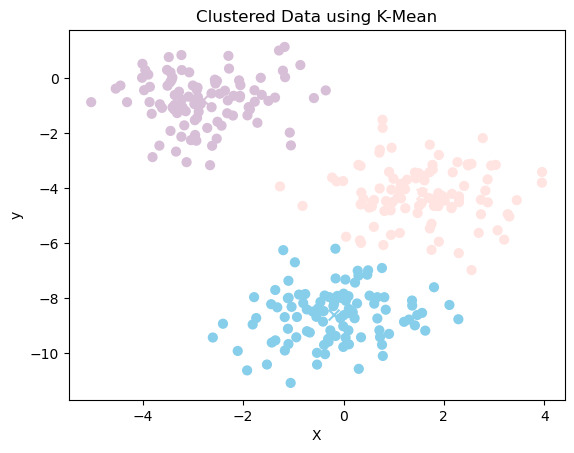

In [18]:
y_KMean_d1 = KMeans(X_blobs,y_blobs,k)

> # 3.1.1 The Accuracy :

> **a. F-measures**

In [19]:
FM_Kmean_d1 = f1_score(y_d1, y_KMean_d1, average='macro')
FM_Kmean_d1

0.33003300330033

> **b. Normalized mutual information.**

In [20]:
NMI_Kmean_d1 = normalized_mutual_info_score(y_d1, y_KMean_d1)
NMI_Kmean_d1

0.970191155455844

> **c. Rand Statistic**

In [21]:
RS_Kmean_d1 = rand_score(y_d1, y_KMean_d1)
RS_Kmean_d1

0.9911705685618729

> # 2. DBSCAN

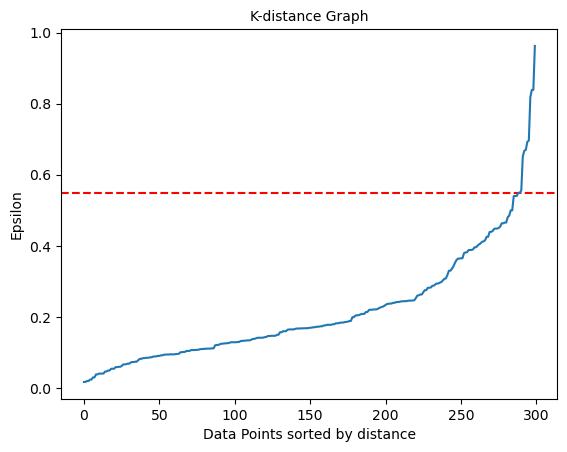

In [22]:
neighbors_D1 = NearestNeighbors(n_neighbors=20)
neighbors_fit_D1 = neighbors_D1.fit(X_blobs)
distances_D1, indices_D1 = neighbors_fit_D1.kneighbors(X_blobs)
distances_D1 = np.sort(distances_D1, axis=0)
distances_D1 = distances_D1[:,1]
plt.axhline(y=0.55, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=10)
plt.xlabel('Data Points sorted by distance',fontsize=10)
plt.ylabel('Epsilon',fontsize=10)
plt.plot(distances_D1)

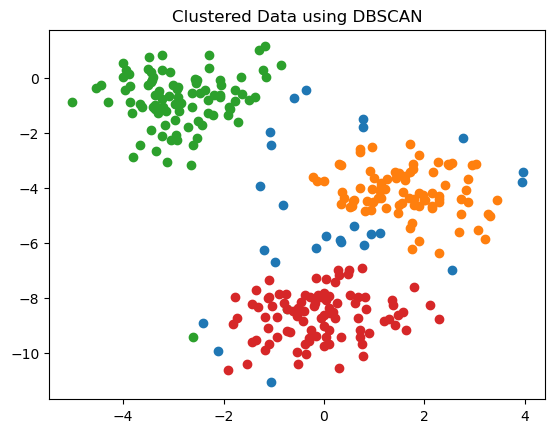

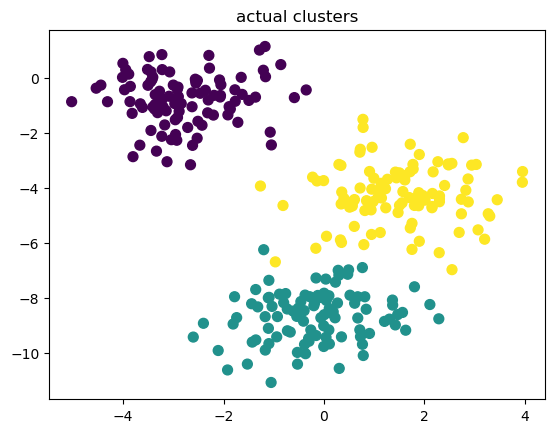

In [23]:
eps_D1 = 0.55
minPts_D1 = 5

df_blobs_D1 = pd.DataFrame(X_blobs, columns = ["X", "Y"] )
clusters_D1 = my_DBSCAN(eps_D1 , minPts_D1 , df_blobs_D1)

cluster_df_D1 = pd.DataFrame(clusters_D1, columns = ["index", "cluster"])
cluster_df_D1[cluster_df_D1 == 3] = -1

for clust in np.unique(cluster_df_D1["cluster"]):
    x_in = X_blobs[cluster_df_D1["index"][cluster_df_D1["cluster"] == clust].values, 0]
    y_in = X_blobs[cluster_df_D1["index"][cluster_df_D1["cluster"] == clust].values, 1]
    plt.scatter(x_in, y_in)
    
plt.title('Clustered Data using DBSCAN')
plt.show() 

plt.title('actual clusters')
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_blobs, s=50)
plt.show() 

> # 3.1.2 The Accuracy :

In [24]:
y_DBSCAN_d1 = np.array(cluster_df_D1["cluster"])

> **a. F-measures**

In [25]:
FM_DBSCAN_d1 = f1_score(y_d1, y_DBSCAN_d1, average='macro')
FM_DBSCAN_d1 

0.23420368153662652

> **b. Normalized mutual information.**

In [26]:
NMI_DBSCAN_d1 = normalized_mutual_info_score(np.sort(y_d1), y_DBSCAN_d1)
NMI_DBSCAN_d1

0.6572742424798784

> **c. Rand Statistic**

In [27]:
RS_DBSCAN_d1 = rand_score(np.sort(y_d1), y_DBSCAN_d1)
RS_DBSCAN_d1

0.8272909698996656

> # 3. Hierarchical clustering

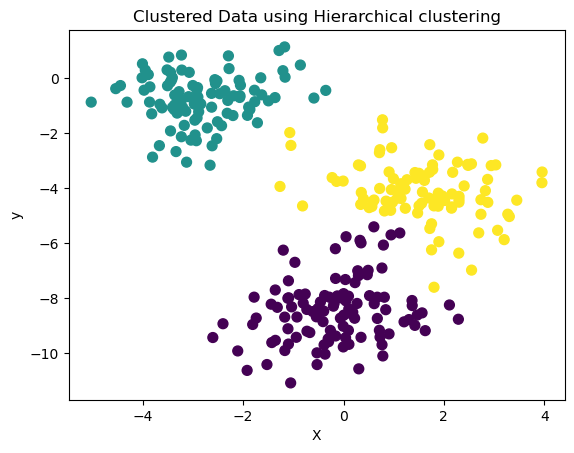

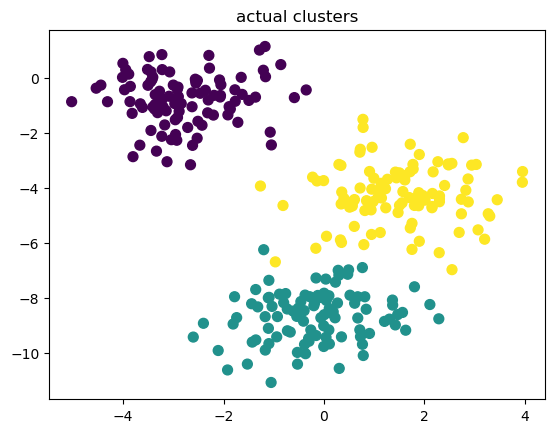

In [28]:
# impliment Hierarchical clustering from sklearn
HC_D1 = AgglomerativeClustering(n_clusters=3,  affinity='euclidean' , linkage = 'ward').fit(X_blobs) # fit the data 
labels_D1 = HC_D1.labels_  # predict the labels

# plot the cluster
plt.scatter(X_blobs[:,0], X_blobs[:,1],c=labels_D1,s=50)
plt.title('Clustered Data using Hierarchical clustering')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

plt.title('actual clusters')
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_blobs, s=50)
plt.show() 

In [29]:
y_HC_d1 = labels_D1

> # 3.1.3 The Accuracy :

> **a. F-measures**

In [30]:
FM_HC_d1 = f1_score(y_d1, labels_D1, average='macro')
FM_HC_d1

0.31271477663230235

> **b. Normalized mutual information.**

In [31]:
NMI_HC_d1 = normalized_mutual_info_score(y_d1, labels_D1)
NMI_HC_d1

0.860576798665127

> **c. Rand Statistic**

In [32]:
RS_HC_d1 = rand_score(y_d1, y_HC_d1)
RS_HC_d1

0.9491638795986622

> # 4. GMM

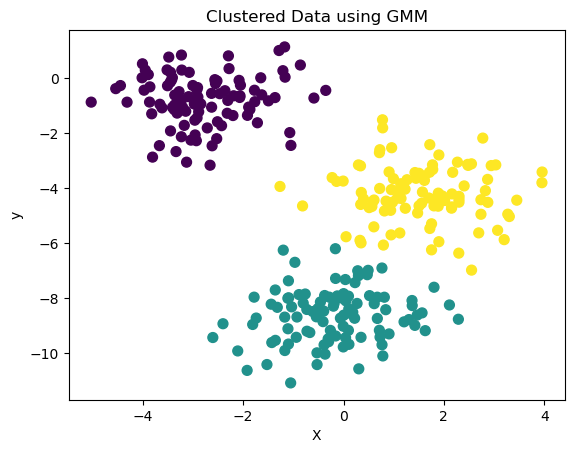

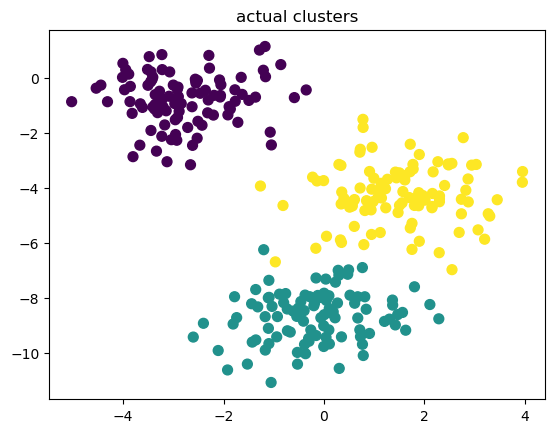

In [33]:
# impliment Gaussian Mixture Modelling from sklearn
GMM_D1 = GaussianMixture(n_components=k).fit(X_blobs) # fit the data 
labels_D1_GMM = GMM_D1.predict(X_blobs) # predict the labels

# plot the cluster
plt.scatter(X_blobs[:,0], X_blobs[:,1],c=labels_D1_GMM,s=50)
plt.title('Clustered Data using GMM')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

plt.title('actual clusters')
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_blobs, s=50)
plt.show() 

> # 3.1.4 The Accuracy :

In [34]:
y_GMM_d1 = labels_D1_GMM

>**a. F-measures**

In [35]:
FM_GMM_d1 = f1_score(y_d1, y_GMM_d1, average='macro')
FM_GMM_d1

0.9933326665999934

> **b. Normalized mutual information.**

In [36]:
NMI_GMM_d1 = normalized_mutual_info_score(y_d1, y_GMM_d1)
NMI_GMM_d1

0.970191155455844

> **c. Rand Statistic**

In [37]:
RS_GMM_d1 = rand_score(y_d1, y_GMM_d1)
RS_GMM_d1

0.9911705685618729

# 4. Summarize The Measures Values on dataset1:

In [38]:
print("\nSummary:")

table1 = [['K-mean',FM_Kmean_d1, NMI_Kmean_d1,RS_Kmean_d1], 
         ['Hierarchical',FM_HC_d1, NMI_HC_d1, RS_HC_d1], 
         ['DBSACN',FM_DBSCAN_d1, NMI_DBSCAN_d1, RS_DBSCAN_d1],
        ['GMM',FM_GMM_d1, NMI_GMM_d1,RS_GMM_d1]]
df_rank1 = pd.DataFrame(table1, columns=['Models', 'F-measures','NMI','Rand Statistic'])
df_rank1.set_index('Models')


Summary:


F-measures       NMI  Rand Statistic
Models                                            
K-mean          0.330033  0.970191        0.991171
Hierarchical    0.312715  0.860577        0.949164
DBSACN          0.234204  0.657274        0.827291
GMM             0.993333  0.970191        0.991171

In [39]:
print("\nRanking:")
df_rank1 = pd.DataFrame(table1, columns=['Models', 'F-measures','NMI','Rand Statistic'])
df_rank1['F-measures']=df_rank1['F-measures'].rank(ascending=False)
df_rank1['NMI']=df_rank1['NMI'].rank(ascending=False)
df_rank1['Rand Statistic']=df_rank1['Rand Statistic'].rank(ascending=False)
df_rank1['rank'] = df_rank1.mean(axis=1)
df_rank1['rank']=df_rank1['rank'].rank(ascending=True)
df_rank1=df_rank1.set_index('Models')
df_rank1


Ranking:


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


F-measures  NMI  Rand Statistic  rank
Models                                             
K-mean               2.0  1.5             1.5   2.0
Hierarchical         3.0  3.0             3.0   3.0
DBSACN               4.0  4.0             4.0   4.0
GMM                  1.0  1.5             1.5   1.0

In [40]:
data_FM = [['FM_Kmean_d1', FM_Kmean_d1], ['FM_DBSCAN_d1', FM_DBSCAN_d1], ['FM_HC_d1', FM_HC_d1], ['FM_GMM_d1', FM_GMM_d1]]
data_NMI = [['NMI_Kmean_d1', NMI_Kmean_d1], ['NMI_DBSCAN_d1', NMI_DBSCAN_d1], ['NMI_HC_d1', NMI_HC_d1], ['NMI_GMM_d1', NMI_GMM_d1]]
data_RS = [['RS_Kmean_d1', RS_Kmean_d1], ['RS_DBSCAN_d1', RS_DBSCAN_d1], ['RS_HC_d1', RS_HC_d1], ['RS_GMM_d1', RS_GMM_d1]]

In [41]:
df_FM= pd.DataFrame(data_FM, columns = ["algorathim","value"])
df_NMI= pd.DataFrame(data_NMI, columns = ["algorathim","value"])
df_RS= pd.DataFrame(data_RS, columns = ["algorathim","value"])

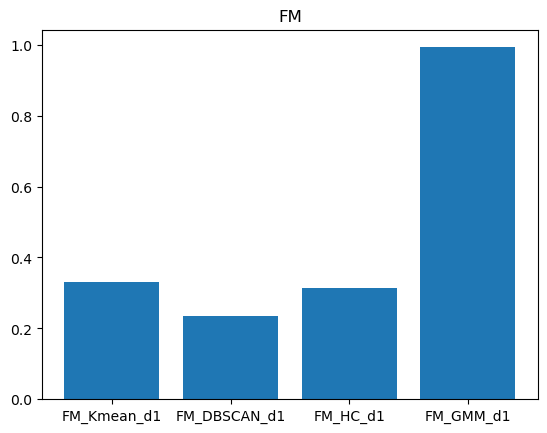

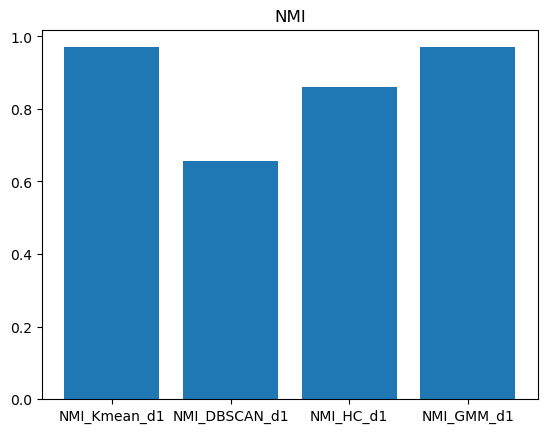

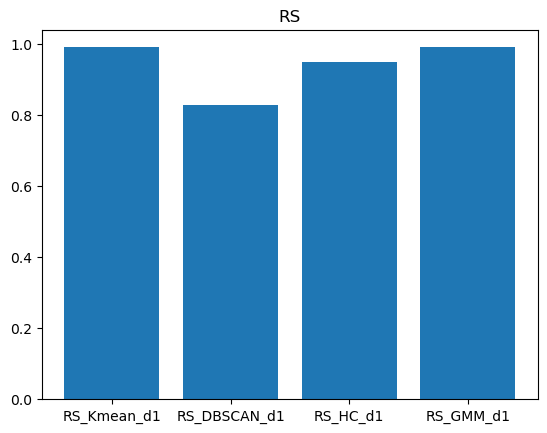

In [42]:
plt.bar(df_FM["algorathim"], df_FM["value"])
plt.title("FM")
plt.show() 
  
plt.bar(df_NMI["algorathim"], df_NMI["value"])
plt.title("NMI")
plt.show() 
  
plt.bar(df_RS["algorathim"], df_RS["value"])
plt.title("RS")
plt.show() 

# Dataset2: Anisotropicly distributed dataset.

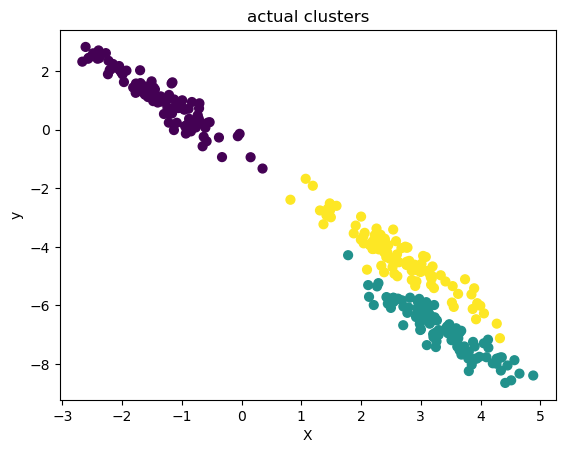

In [43]:
X_anis, y_anis = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_anis = np.dot(X_anis, transformation)
plt.scatter(X_anis[:,0], X_anis[:,1], c=y_anis,s=40)
plt.title('actual clusters')
plt.xlabel("X")
plt.ylabel("y")
plt.show() 

In [44]:
# Number of clusters
k = 3

# actual Cluster 
y_d2 = y_anis

> # 1. K-Mean


initialize the centroids randomly:
 [[-0.02394504 -2.82044461]
 [ 1.64587808 -4.1309133 ]
 [ 1.09967675  1.077988  ]] 



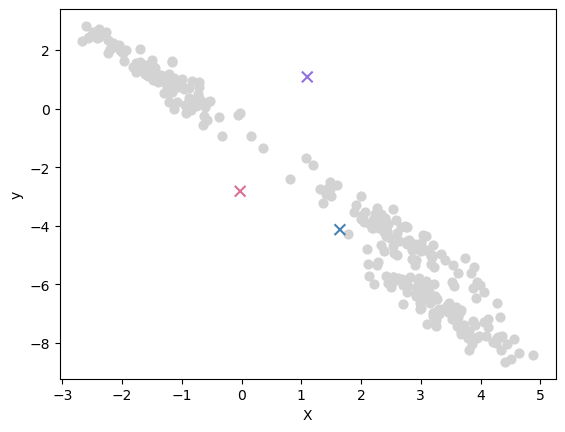


assign point to the clusters :



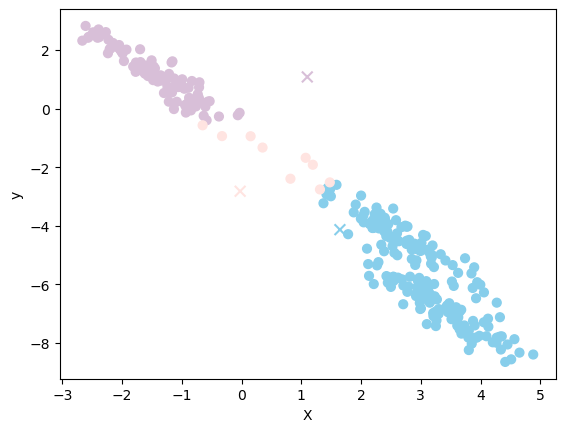

Number of iteration: 1

update the centroid :



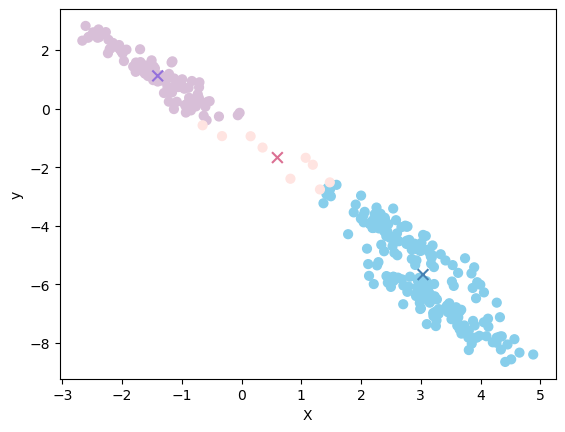


assign point to the clusters :



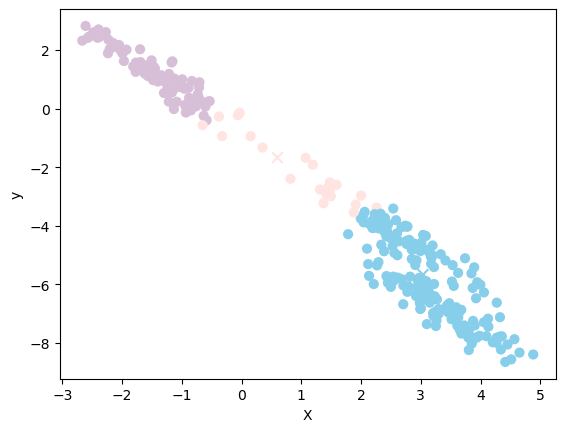

Number of iteration: 2

update the centroid :



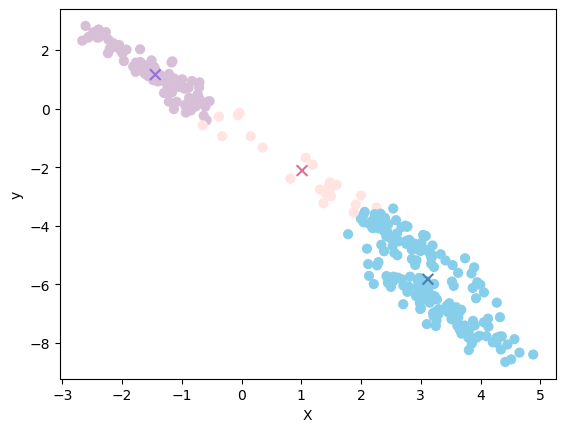


assign point to the clusters :



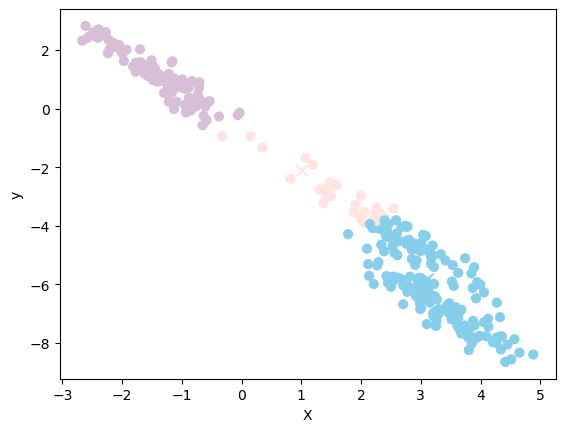

Number of iteration: 3

update the centroid :



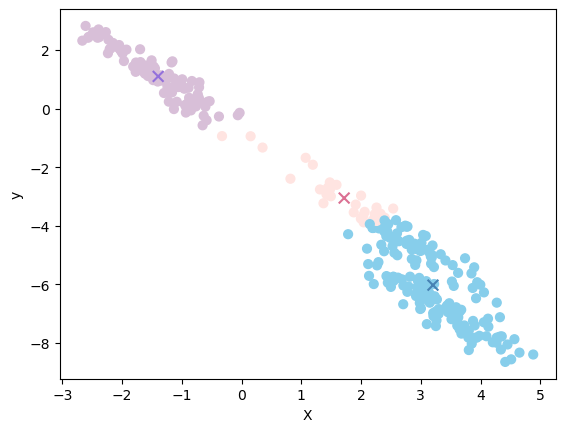


assign point to the clusters :



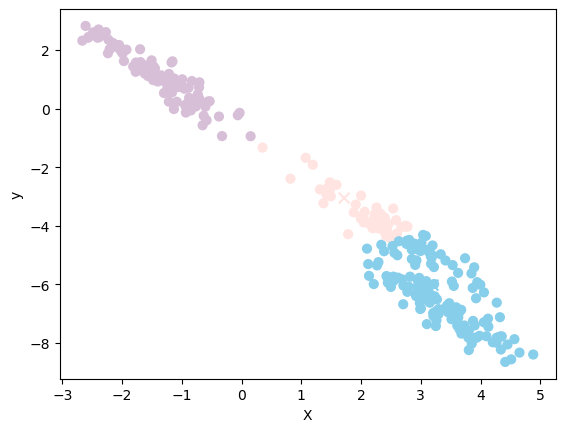

Number of iteration: 4

update the centroid :



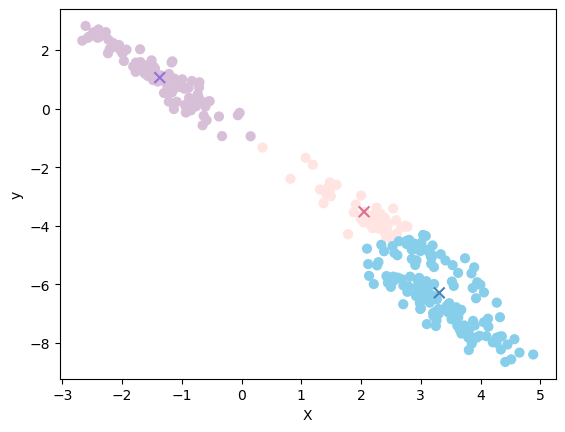


assign point to the clusters :



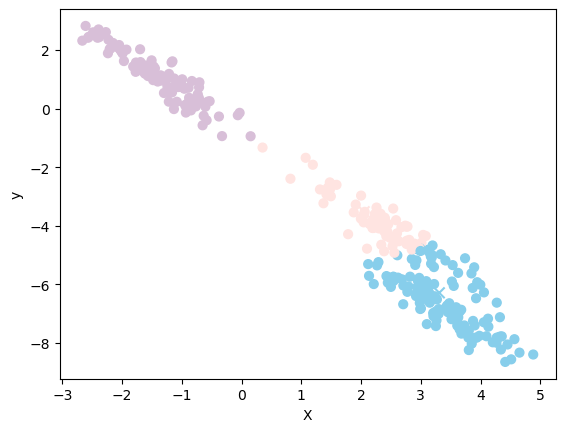

Number of iteration: 5

update the centroid :



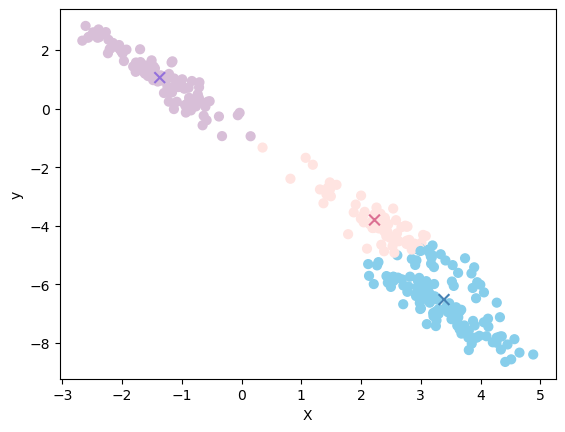


assign point to the clusters :



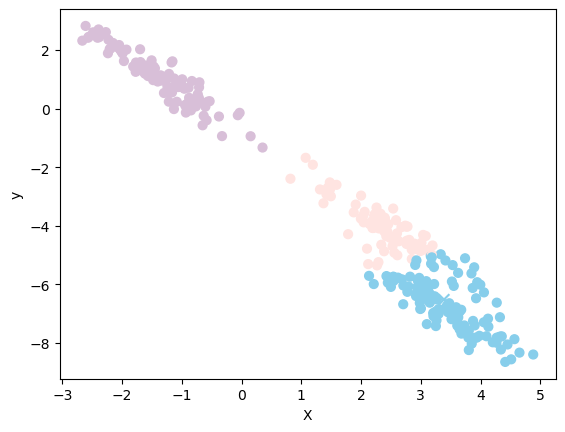

Number of iteration: 6

update the centroid :



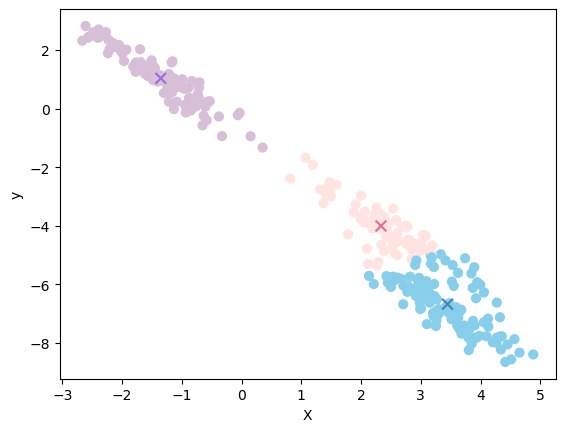


assign point to the clusters :



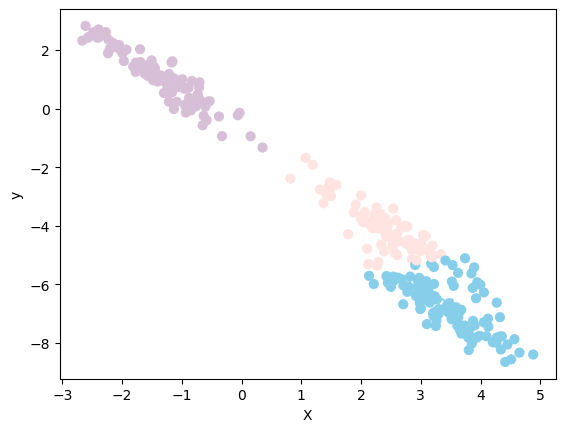

Number of iteration: 7

update the centroid :



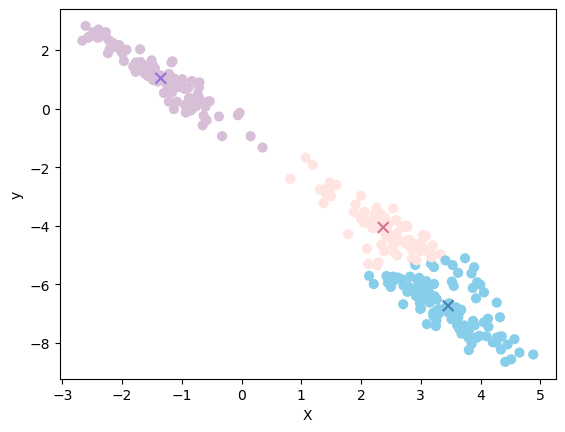


assign point to the clusters :



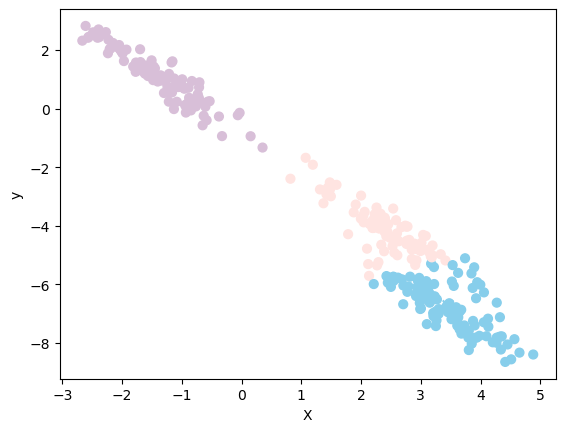

Number of iteration: 8

update the centroid :



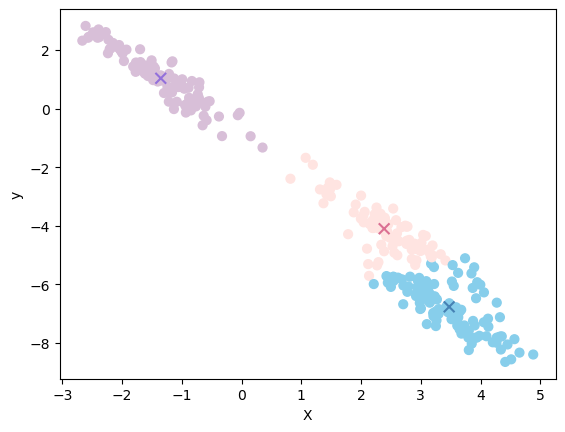


assign point to the clusters :



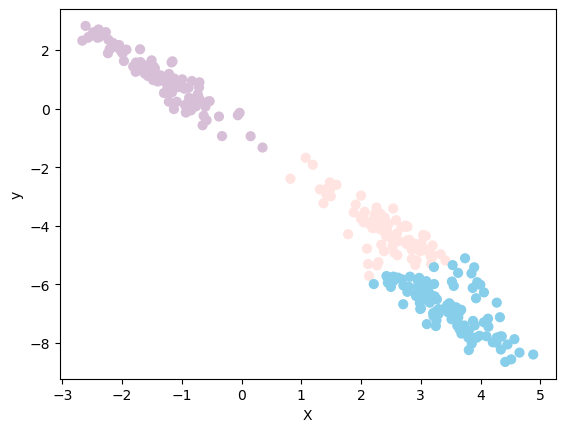

Number of iteration: 9

update the centroid :



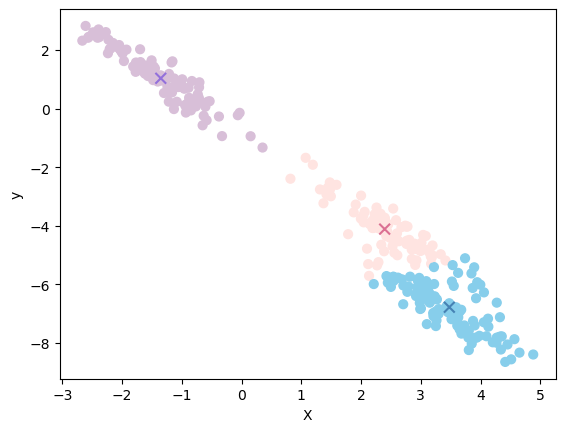


assign point to the clusters :



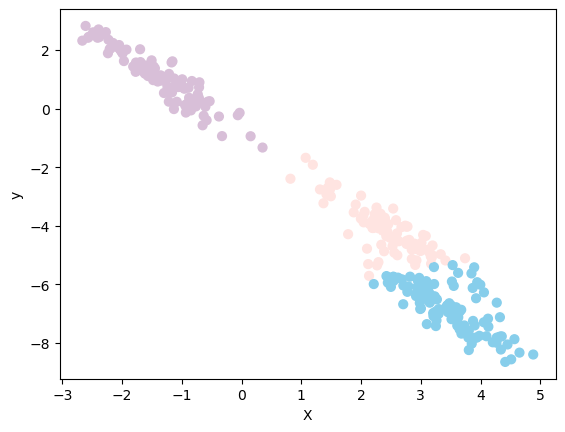


final result:



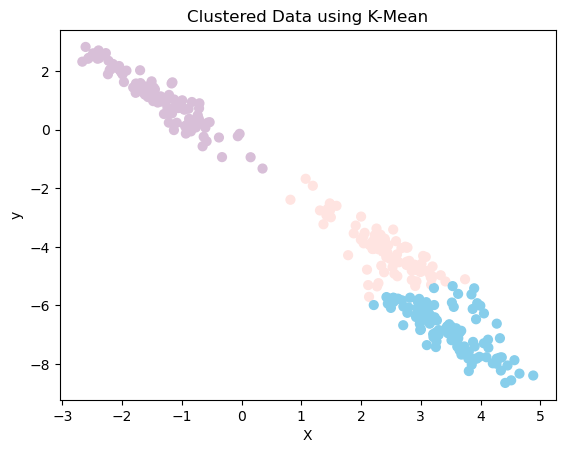

In [45]:
y_KMean_d2 = KMeans(X_anis, y_anis,k)

> # 3.2.1 The Accuracy :

> **a. F-measures**

In [46]:
FM_Kmean_d2 = f1_score(y_d2, y_KMean_d2, average='macro')
FM_Kmean_d2

0.30303030303030304

> **b. Normalized mutual information.**

In [47]:
NMI_Kmean_d2 = normalized_mutual_info_score(y_d2, y_KMean_d2)
NMI_Kmean_d2

0.8154390758567646

> **c. Rand Statistic**

In [48]:
RS_Kmean_d2 = rand_score(y_d2, y_KMean_d2)
RS_Kmean_d2

0.9233221850613155

> # 2. DBSCAN

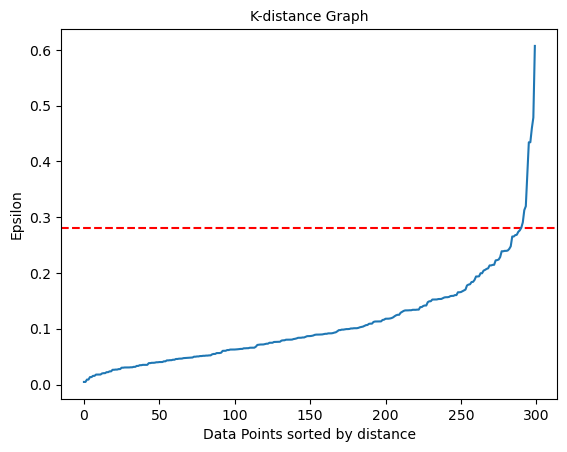

In [49]:
neighbors_D2 = NearestNeighbors(n_neighbors=20)
neighbors_fit_D2 = neighbors_D2.fit(X_anis)
distances_D2, indices = neighbors_fit_D2.kneighbors(X_anis)
distances_D2 = np.sort(distances_D2, axis=0)
distances_D2 = distances_D2[:,1]
plt.axhline(y=0.28, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=10)
plt.xlabel('Data Points sorted by distance',fontsize=10)
plt.ylabel('Epsilon',fontsize=10)
plt.plot(distances_D2)

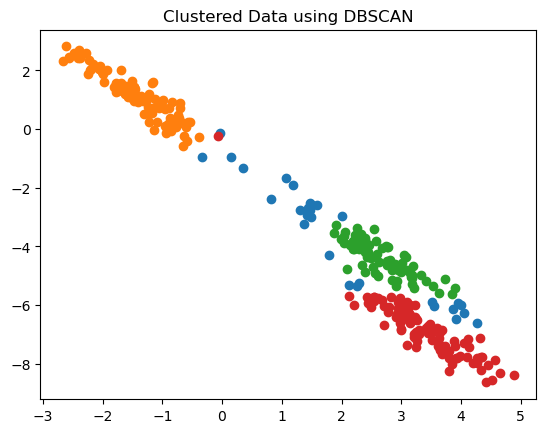

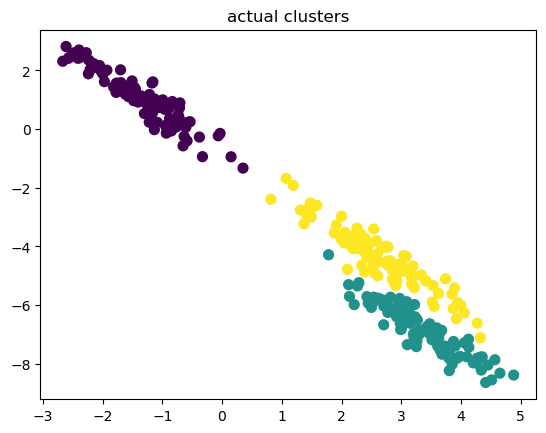

In [50]:
eps_D2 = 0.28
minPts_D2 = 5

df_anis_D2 = pd.DataFrame(X_anis, columns = ["X", "Y"] )
clusters_D2 = my_DBSCAN(eps_D2 , minPts_D2 , df_anis_D2)

cluster_df_D2 = pd.DataFrame(clusters_D2, columns = ["index", "cluster"])
cluster_df_D2[cluster_df_D2 == 3] = -1

for clust in np.unique(cluster_df_D2["cluster"]):
    x_in = X_anis[cluster_df_D2["index"][cluster_df_D2["cluster"] == clust].values, 0]
    y_in = X_anis[cluster_df_D2["index"][cluster_df_D2["cluster"] == clust].values, 1]
    plt.scatter(x_in, y_in)

plt.title('Clustered Data using DBSCAN')
plt.show() 

plt.title('actual clusters')
plt.scatter(X_anis[:, 0], X_anis[:, 1], c=y_anis, s=50)
plt.show() 

> # 3.2.2 The Accuracy :

In [51]:
y_DBSCAN_d2 = np.array(cluster_df_D2["cluster"])

> **a. F-measures**

In [52]:
FM_DBSCAN_d2 = f1_score(y_d2, y_DBSCAN_d2, average='macro')
FM_DBSCAN_d2

0.23210584671258827

> **b. Normalized mutual information.**

In [53]:
NMI_DBSCAN_d2 = normalized_mutual_info_score(np.sort(y_d2), y_DBSCAN_d2)
NMI_DBSCAN_d2

0.7041156909738704

> **c. Rand Statistic**

In [54]:
RS_DBSCAN_d2 = rand_score(np.sort(y_d2), y_DBSCAN_d2)
RS_DBSCAN_d2

0.8566109253065775

> # 3. Hierarchical clustering

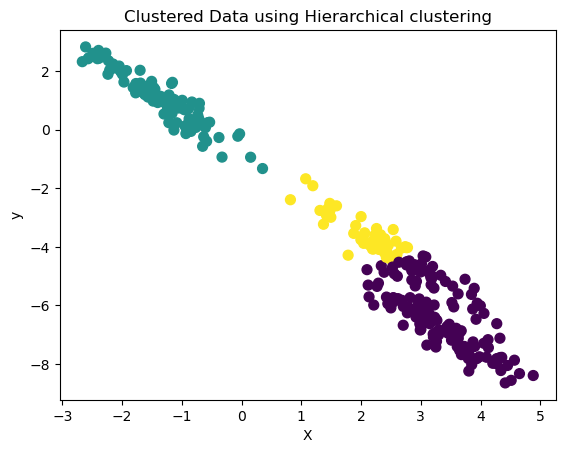

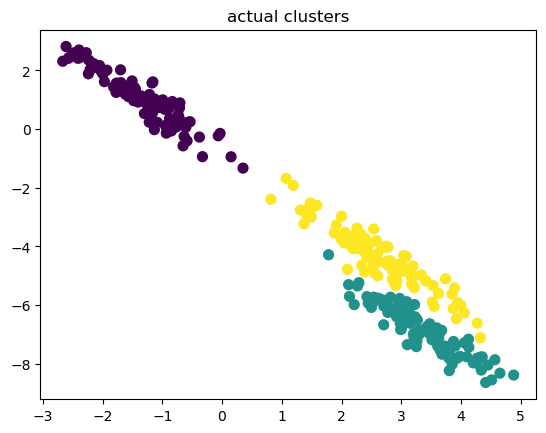

In [55]:
# impliment Hierarchical clustering from sklearn
HC_D2 = AgglomerativeClustering(n_clusters=3,  affinity='euclidean' , linkage = 'ward').fit(X_anis) # fit the data 
labels_D2 = HC_D2.labels_  # predict the labels

# plot the cluster
plt.scatter(X_anis[:,0], X_anis[:,1],c=labels_D2,s=50)
plt.title('Clustered Data using Hierarchical clustering')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

plt.title('actual clusters')
plt.scatter(X_anis[:, 0], X_anis[:, 1], c=y_anis, s=50)
plt.show() 

In [56]:
y_HC_d2 = labels_D2

> # 3.2.3 The Accuracy :

> **a. F-measures**

In [57]:
FM_HC_d2 = f1_score(y_d2, y_HC_d2, average='macro')
FM_HC_d2

0.22368421052631582

> **b. Normalized mutual information.**

In [58]:
NMI_HC_d2 = normalized_mutual_info_score(y_d2, y_HC_d2)
NMI_HC_d2

0.726351288763724

> **c. Rand Statistic**

In [59]:
RS_HC_d2 = rand_score(y_d2, y_HC_d2)
RS_HC_d2

0.8327759197324415

> # 4.GMM

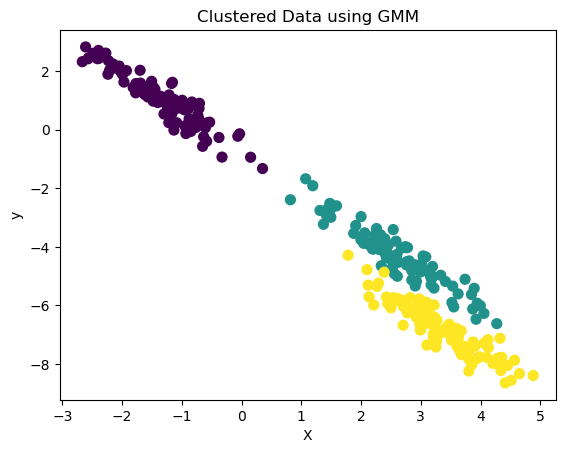

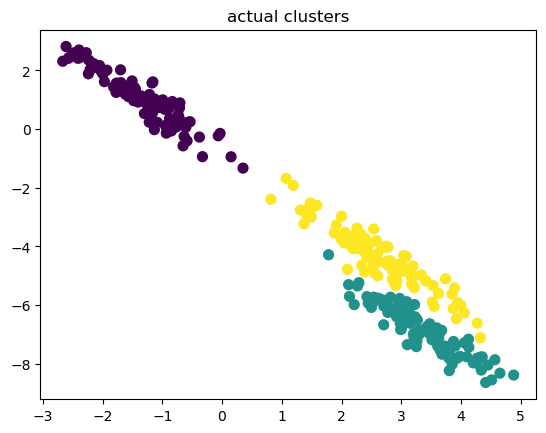

In [60]:
# impliment Gaussian Mixture Modelling from sklearn
GMM_D2 = GaussianMixture(n_components=k).fit(X_anis) # fit the data 
labels_D2_GMM = GMM_D2.predict(X_anis) # predict the labels

# plot the cluster
plt.scatter(X_anis[:,0], X_anis[:,1],c=labels_D2_GMM,s=50)
plt.title('Clustered Data using GMM')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

plt.title('actual clusters')
plt.scatter(X_anis[:, 0], X_anis[:, 1], c=y_anis, s=50)
plt.show() 

> # 3.2.4 The Accuracy :

In [61]:
y_GMM_d2 = labels_D2_GMM

> **a. F-measures**

In [62]:
FM_GMM_d2 = f1_score(y_d2, y_GMM_d2, average='macro')
FM_GMM_d2

0.3431855500821018

> **b. Normalized mutual information.**

In [63]:
NMI_GMM_d2 = normalized_mutual_info_score(y_d2, y_GMM_d2)
NMI_GMM_d2

0.9589753057921956

> **c. Rand Statistic**

In [64]:
RS_GMM_d2 = rand_score(y_d2, y_GMM_d2)
RS_GMM_d2

0.9868227424749164

# 4. Summarize The Measures Values on dataset2:

In [65]:
print("\nSummary:")

table2 = [['K-mean',FM_Kmean_d2, NMI_Kmean_d2,RS_Kmean_d2], 
         ['Hierarchical',FM_HC_d2, NMI_HC_d2, RS_HC_d2], 
         ['DBSACN',FM_DBSCAN_d2, NMI_DBSCAN_d2, RS_DBSCAN_d2],
        ['GMM',FM_GMM_d2, NMI_GMM_d2,RS_GMM_d2]]
df_rank2 = pd.DataFrame(table2, columns=['Models', 'F-measures','NMI','Rand Statistic'])
df_rank2.set_index('Models')


Summary:


F-measures       NMI  Rand Statistic
Models                                            
K-mean          0.303030  0.815439        0.923322
Hierarchical    0.223684  0.726351        0.832776
DBSACN          0.232106  0.704116        0.856611
GMM             0.343186  0.958975        0.986823

In [66]:
print("\nRanking:")
df_rank2 = pd.DataFrame(table2, columns=['Models', 'F-measures','NMI','Rand Statistic'])
df_rank2['F-measures']=df_rank2['F-measures'].rank(ascending=False)
df_rank2['NMI']=df_rank2['NMI'].rank(ascending=False)
df_rank2['Rand Statistic']=df_rank2['Rand Statistic'].rank(ascending=False)
df_rank2['rank'] = df_rank2.mean(axis=1)
df_rank2['rank']=df_rank2['rank'].rank(ascending=True)
df_rank2=df_rank2.set_index('Models')
df_rank2


Ranking:


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


F-measures  NMI  Rand Statistic  rank
Models                                             
K-mean               2.0  2.0             2.0   2.0
Hierarchical         4.0  3.0             4.0   4.0
DBSACN               3.0  4.0             3.0   3.0
GMM                  1.0  1.0             1.0   1.0

In [67]:
data_FM2 = [['FM_Kmean_d2', FM_Kmean_d2], ['FM_DBSCAN_d2', FM_DBSCAN_d2], ['FM_HC_d2', FM_HC_d2], ['FM_GMM_d2', FM_GMM_d2]]
data_NMI2 = [['NMI_Kmean_d2', NMI_Kmean_d2], ['NMI_DBSCAN_d2', NMI_DBSCAN_d2], ['NMI_HC_d2', NMI_HC_d2], ['NMI_GMM_d2', NMI_GMM_d2]]
data_RS2 = [['RS_Kmean_d2', RS_Kmean_d2], ['RS_DBSCAN_d2', RS_DBSCAN_d2], ['RS_HC_d2', RS_HC_d2], ['RS_GMM_d2', RS_GMM_d2]]

In [68]:
df_FM2= pd.DataFrame(data_FM2, columns = ["algorathim","value"])
df_NMI2= pd.DataFrame(data_NMI2, columns = ["algorathim","value"])
df_RS2= pd.DataFrame(data_RS2, columns = ["algorathim","value"])

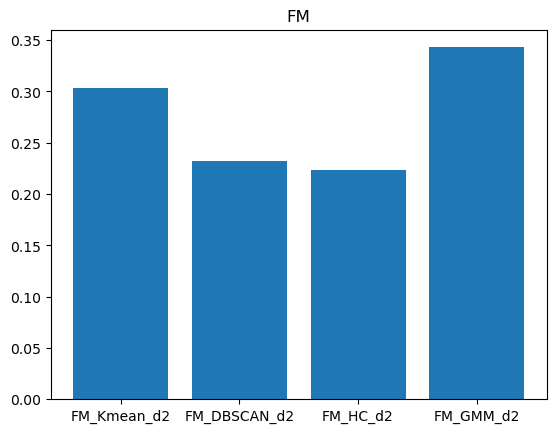

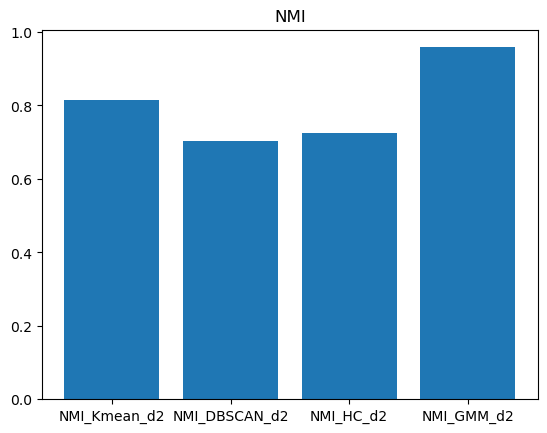

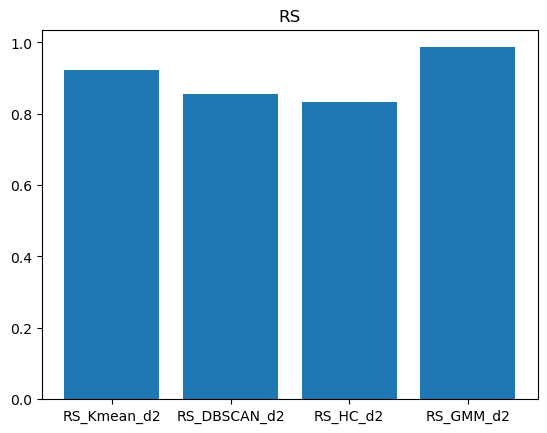

In [69]:
plt.bar(df_FM2["algorathim"], df_FM2["value"])
plt.title("FM")
plt.show() 
  
plt.bar(df_NMI2["algorathim"], df_NMI2["value"])
plt.title("NMI")
plt.show() 
  
plt.bar(df_RS2["algorathim"], df_RS2["value"])
plt.title("RS")
plt.show() 

# Dataset3: Noisy moons dataset

Text(0, 0.5, 'y')

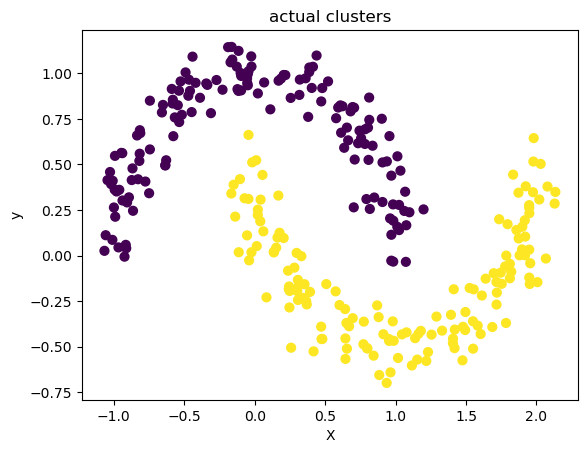

In [70]:
X_moon, y_moon = datasets.make_moons(n_samples=n_samples, noise=0.1, random_state=random_state)
plt.scatter(X_moon[:,0], X_moon[:,1], c=y_moon,s=40)
plt.title('actual clusters')
plt.xlabel("X")
plt.ylabel("y")

In [71]:
# Number of clusters
k = 2

# actual Cluster 
y_d3 = y_moon

> # 1. K-Mean


initialize the centroids randomly:
 [[ 1.48461442  0.91261807]
 [-0.11891471 -0.55475879]] 



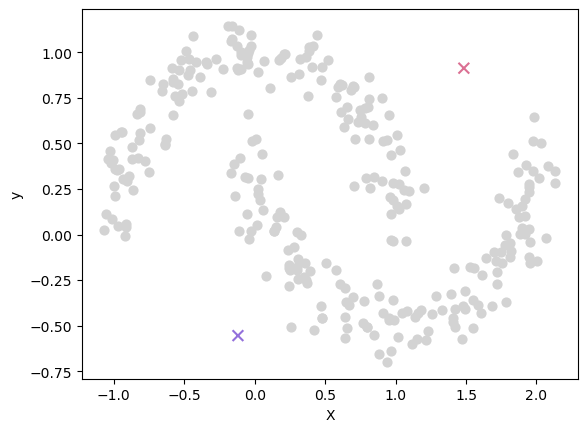


assign point to the clusters :



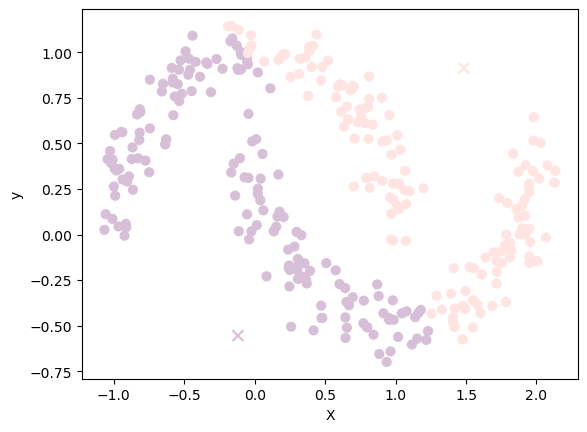

Number of iteration: 1

update the centroid :



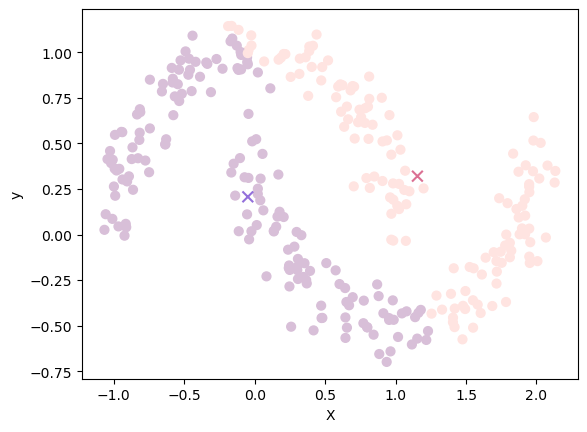


assign point to the clusters :



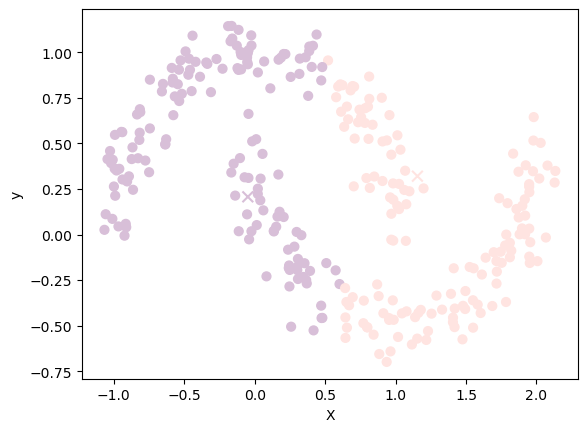

Number of iteration: 2

update the centroid :



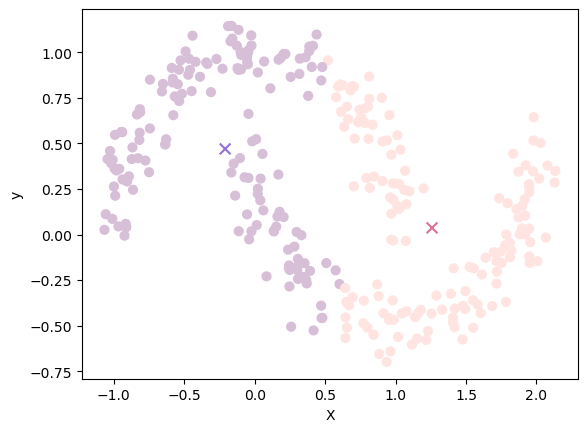


assign point to the clusters :



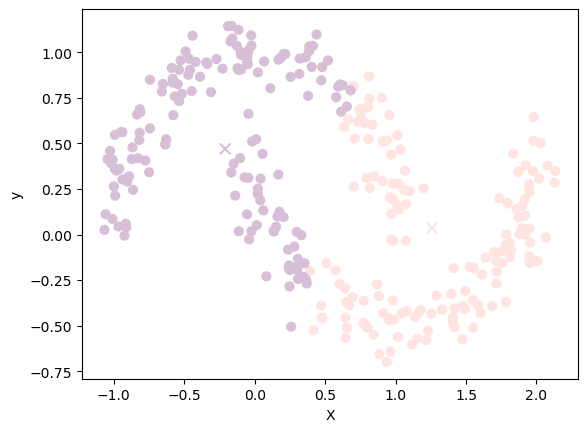

Number of iteration: 3

update the centroid :



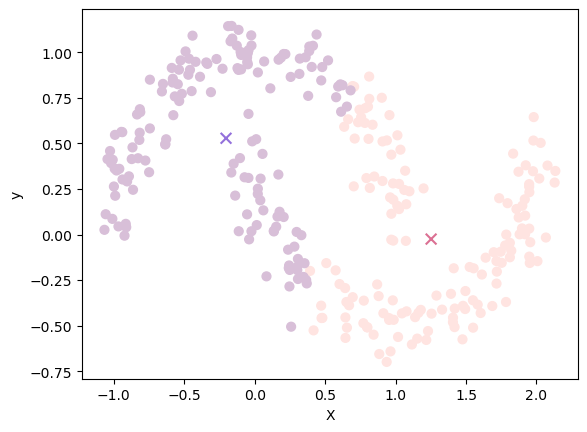


assign point to the clusters :



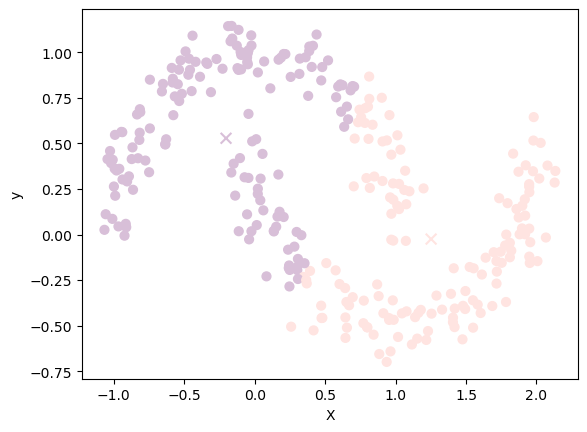

Number of iteration: 4

update the centroid :



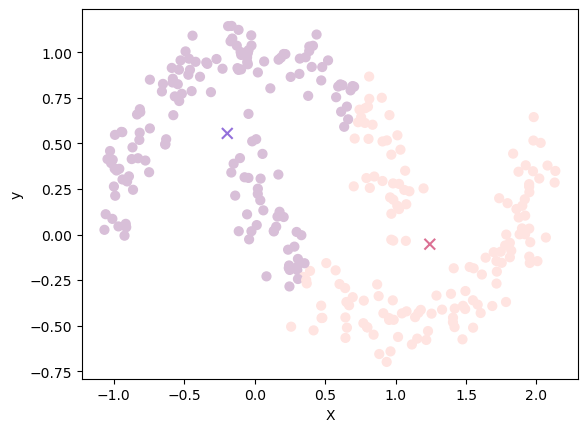


assign point to the clusters :



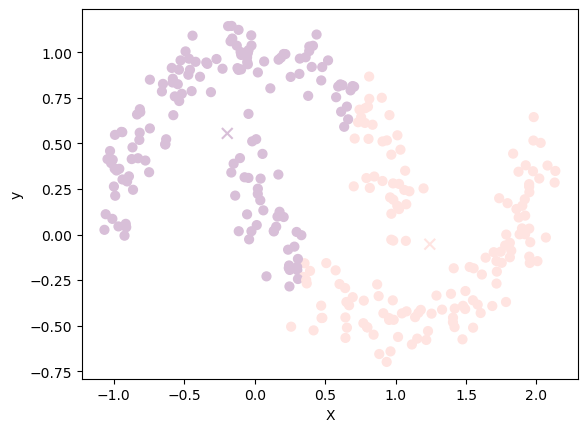

Number of iteration: 5

update the centroid :



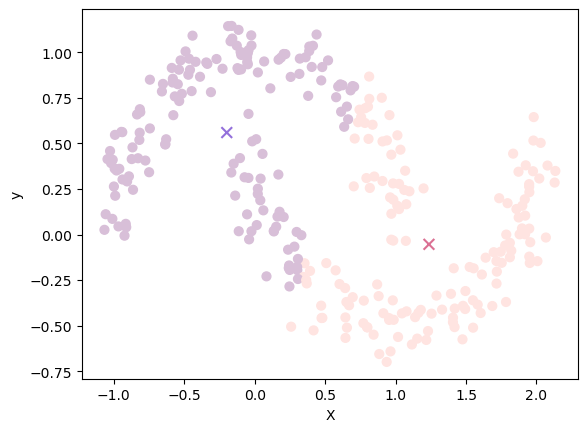


assign point to the clusters :



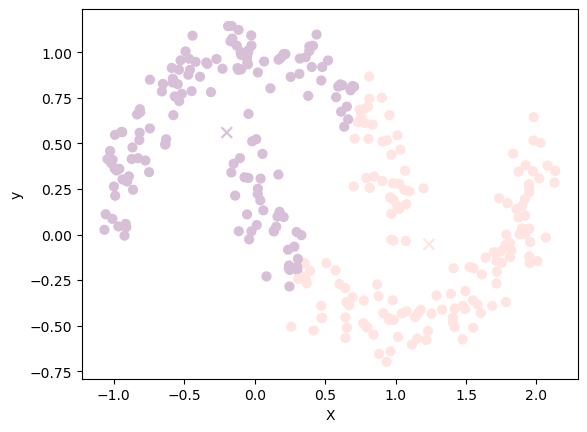

Number of iteration: 6

update the centroid :



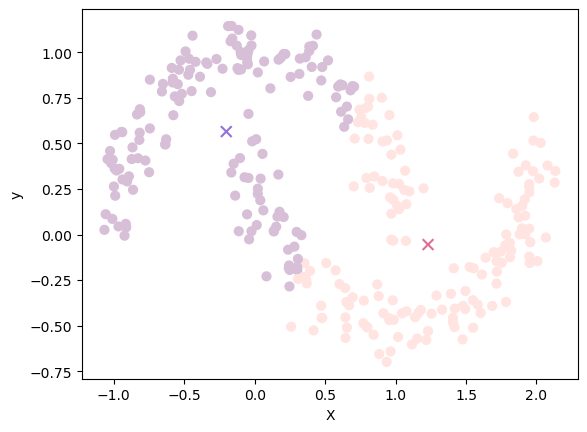


assign point to the clusters :



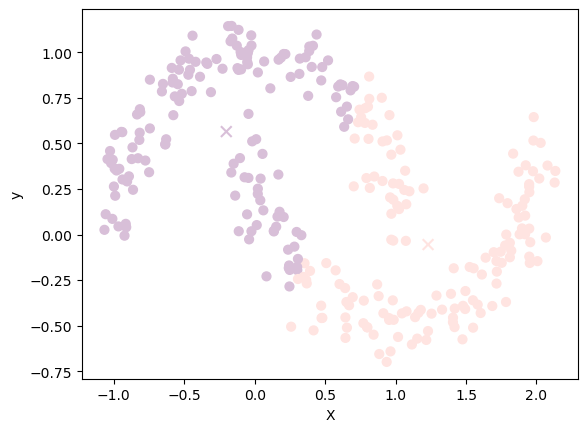


final result:



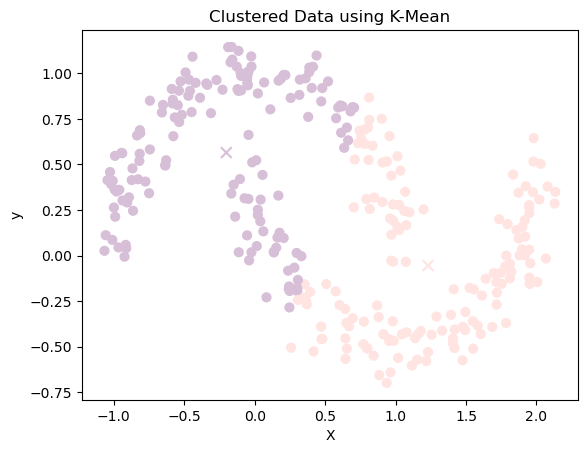

In [72]:
y_KMean_d3 = KMeans(X_moon,y_moon,k)

> # 3.3.1 The Accuracy :

> **a. F-measures**

In [73]:
FM_Kmean_d3 = f1_score(y_d3, y_KMean_d3, average='macro')
FM_Kmean_d3

0.2599671096493178

> **b. Normalized mutual information.**

In [74]:
NMI_Kmean_d3 = normalized_mutual_info_score(y_d3, y_KMean_d3)
NMI_Kmean_d3

0.17330314218190393

> **c. Rand Statistic**

In [75]:
RS_Kmean_d3 = rand_score(y_d3, y_KMean_d3)
RS_Kmean_d3

0.6139130434782609

> # 2. DBSCAN

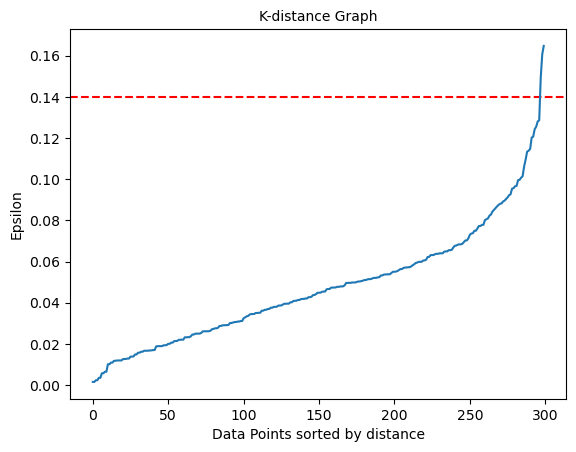

In [76]:
neighbors_D3 = NearestNeighbors(n_neighbors=20)
neighbors_fit_D3 = neighbors_D3.fit(X_moon)
distances_D3, indices = neighbors_fit_D3.kneighbors(X_moon)
distances_D3 = np.sort(distances_D3, axis=0)
distances_D3 = distances_D3[:,1]
plt.axhline(y=0.14, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=10)
plt.xlabel('Data Points sorted by distance',fontsize=10)
plt.ylabel('Epsilon',fontsize=10)
plt.plot(distances_D3)

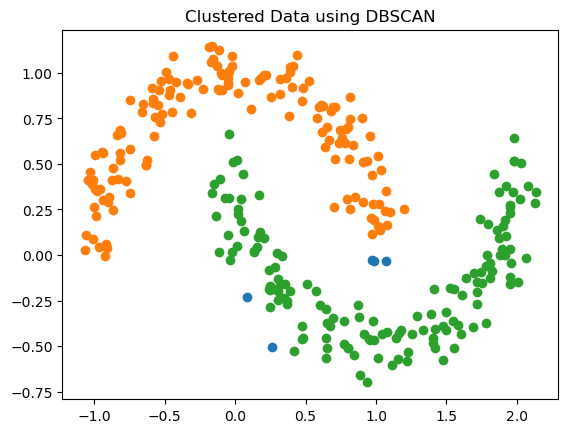

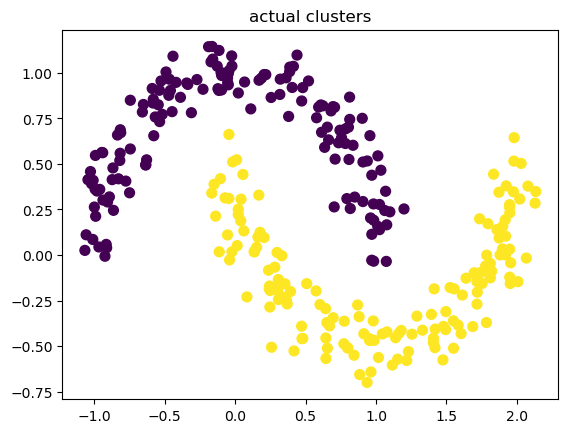

In [77]:
eps_D3 = 0.14
minPts_D3 = 5

df_moon_D3 = pd.DataFrame(X_moon, columns = ["X", "Y"] )
clusters_D3 = my_DBSCAN(eps_D3 , minPts_D3 , df_moon_D3)

cluster_df_D3 = pd.DataFrame(clusters_D3, columns = ["index", "cluster"])
cluster_df_D3[cluster_df_D3 == 2] = -1

for clust in np.unique(cluster_df_D3["cluster"]):
    x_in = X_moon[cluster_df_D3["index"][cluster_df_D3["cluster"] == clust].values, 0]
    y_in = X_moon[cluster_df_D3["index"][cluster_df_D3["cluster"] == clust].values, 1]
    plt.scatter(x_in, y_in)

plt.title('Clustered Data using DBSCAN')
plt.show() 

plt.title('actual clusters')
plt.scatter(X_moon[:, 0], X_moon[:, 1], c=y_moon, s=50)
plt.show() 

> # 3.3.2 The Accuracy :

In [78]:
y_DBSCAN_d3 = np.array(cluster_df_D3["cluster"])

> **a. F-measures**

In [79]:
FM_DBSCAN_d3 = rand_score(y_d3, y_DBSCAN_d3)
FM_DBSCAN_d3

0.5051727982162765

> **b. Normalized mutual information.**

In [80]:
NMI_DBSCAN_d3 = rand_score(np.sort(y_d3), y_DBSCAN_d3)
NMI_DBSCAN_d3

0.9643032329988852

> **c. Rand Statistic**

In [81]:
RS_DBSCAN_d3 = rand_score(np.sort(y_d3), y_DBSCAN_d3)
RS_DBSCAN_d3

0.9643032329988852

> # 3. Hierarchical clustering

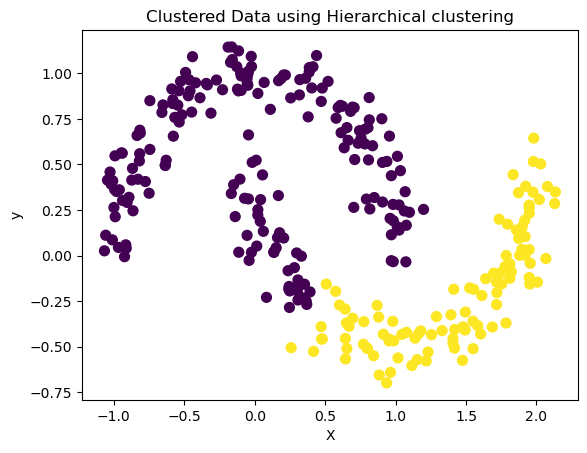

In [82]:
# impliment Hierarchical clustering from sklearn
HC_D3 = AgglomerativeClustering(n_clusters=2,  affinity='euclidean' , linkage = 'ward').fit(X_moon) # fit the data 
labels_D3 = HC_D3.labels_  # predict the labels

# plot the cluster
plt.scatter(X_moon[:,0], X_moon[:,1],c=labels_D3,s=50)
plt.title('Clustered Data using Hierarchical clustering')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [83]:
y_HC_d3 = labels_D3

> # 3.3.3 The Accuracy :

> **a. F-measures**

In [84]:
FM_HC_d3 = f1_score(y_d3, y_HC_d3, average='macro')
FM_HC_d3

0.8429748304583313

> **b. Normalized mutual information.**

In [85]:
NMI_HC_d3 = normalized_mutual_info_score(y_d3, y_HC_d3)
NMI_HC_d3

0.5037780276789305

> **c. Rand Statistic**

In [86]:
RS_HC_d3 = rand_score(y_d3, y_HC_d3)
RS_HC_d3

0.7394871794871795

> # 4. GMM

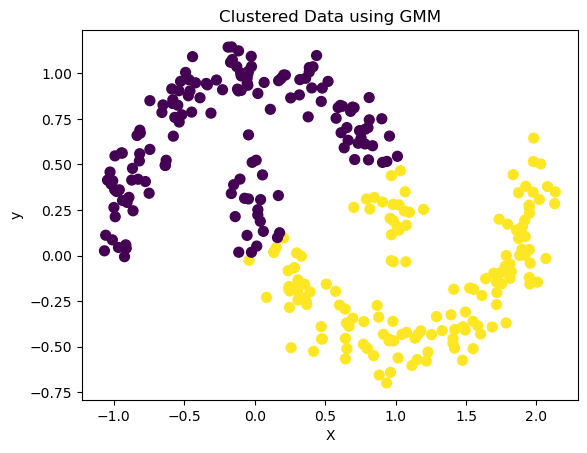

In [87]:
# impliment Gaussian Mixture Modelling from sklearn
GMM_D3 = GaussianMixture(n_components=k).fit(X_moon) # fit the data 
labels_D3_GMM = GMM_D3.predict(X_moon) # predict the labels

# plot the cluster
plt.scatter(X_moon[:,0], X_moon[:,1],c=labels_D3_GMM,s=50)
plt.title('Clustered Data using GMM')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

> # 3.3.4 The Accuracy :

In [88]:
y_GMM_d3 = labels_D3_GMM

> **a. F-measures**

In [89]:
FM_GMM_d3 = f1_score(y_d3, y_GMM_d3, average='macro')
FM_GMM_d3

0.8533333333333335

> **b. Normalized mutual information.**

In [90]:
NMI_GMM_d3 = normalized_mutual_info_score(y_d3, y_GMM_d3)
NMI_GMM_d3

0.39856461357092277

> **c. Rand Statistic**

In [91]:
RS_GMM_d3 = rand_score(y_d3, y_GMM_d3)
RS_GMM_d3

0.7488517279821628

# 4. Summarize The Measures Values on dataset3:

In [92]:
print("\nSummary:")
table3 = [['K-mean',FM_Kmean_d3, NMI_Kmean_d3,RS_Kmean_d3], 
         ['Hierarchical',FM_HC_d3, NMI_HC_d3, RS_HC_d3], 
         ['DBSACN',FM_DBSCAN_d3, NMI_DBSCAN_d3, RS_DBSCAN_d3],
        ['GMM',FM_GMM_d3, NMI_GMM_d3,RS_GMM_d3]]
df_rank3 = pd.DataFrame(table3, columns=['Models', 'F-measures','NMI','Rand Statistic'])
df_rank3.set_index('Models')


Summary:


F-measures       NMI  Rand Statistic
Models                                            
K-mean          0.259967  0.173303        0.613913
Hierarchical    0.842975  0.503778        0.739487
DBSACN          0.505173  0.964303        0.964303
GMM             0.853333  0.398565        0.748852

In [93]:
print("\nRanking:")
df_rank3 = pd.DataFrame(table3, columns=['Models', 'F-measures','NMI','Rand Statistic'])
df_rank3['F-measures']=df_rank3['F-measures'].rank(ascending=False)
df_rank3['NMI']=df_rank3['NMI'].rank(ascending=False)
df_rank3['Rand Statistic']=df_rank3['Rand Statistic'].rank(ascending=False)
df_rank3['rank'] = df_rank3.mean(axis=1)
df_rank3['rank']=df_rank3['rank'].rank(ascending=True)
df_rank3=df_rank3.set_index('Models')
df_rank3


Ranking:


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


F-measures  NMI  Rand Statistic  rank
Models                                             
K-mean               4.0  4.0             4.0   4.0
Hierarchical         2.0  2.0             3.0   3.0
DBSACN               3.0  1.0             1.0   1.0
GMM                  1.0  3.0             2.0   2.0

In [94]:
data_FM3 = [['FM_Kmean_d3', FM_Kmean_d3], ['FM_DBSCAN_d3', FM_DBSCAN_d3], ['FM_HC_d3', FM_HC_d3], ['FM_GMM_d3', FM_GMM_d3]]
data_NMI3 = [['NMI_Kmean_d3', NMI_Kmean_d3], ['NMI_DBSCAN_d3', NMI_DBSCAN_d3], ['NMI_HC_d3', NMI_HC_d3], ['NMI_GMM_d3', NMI_GMM_d3]]
data_RS3 = [['RS_Kmean_d3', RS_Kmean_d3], ['RS_DBSCAN_d3', RS_DBSCAN_d3], ['RS_HC_d3', RS_HC_d3], ['RS_GMM_d3', RS_GMM_d3]]

In [95]:
df_FM3= pd.DataFrame(data_FM3, columns = ["algorathim","value"])
df_NMI3= pd.DataFrame(data_NMI3, columns = ["algorathim","value"])
df_RS3= pd.DataFrame(data_RS3, columns = ["algorathim","value"])

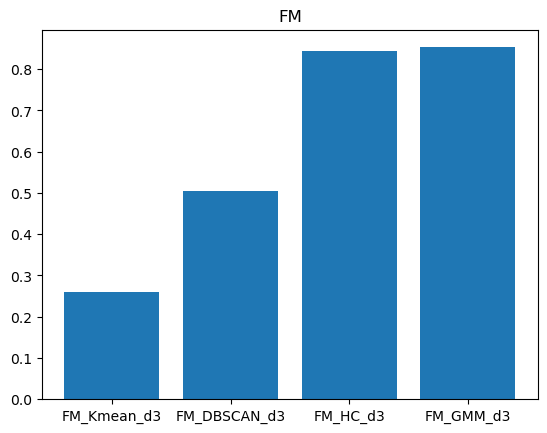

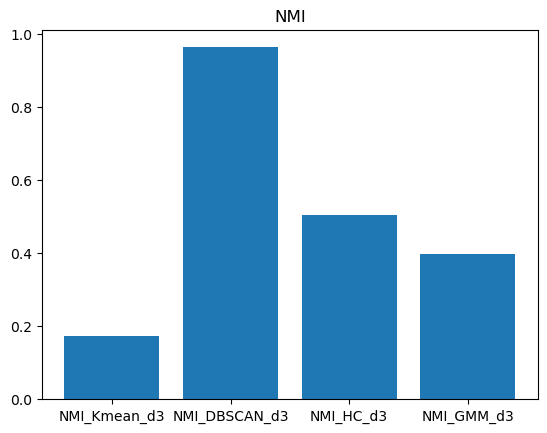

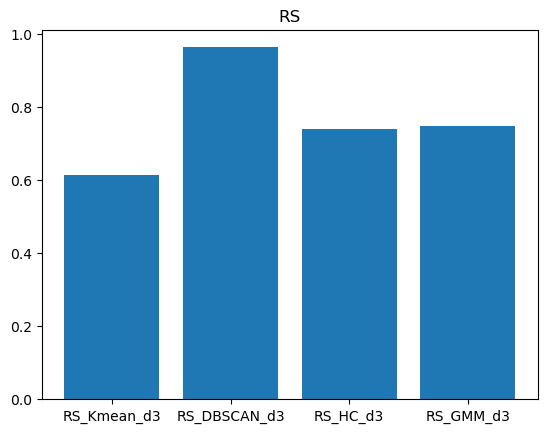

In [96]:
plt.bar(df_FM3["algorathim"], df_FM3["value"])
plt.title("FM")
plt.show() 
  
plt.bar(df_NMI3["algorathim"], df_NMI3["value"])
plt.title("NMI")
plt.show() 
  
plt.bar(df_RS3["algorathim"], df_RS3["value"])
plt.title("RS")
plt.show() 

# Dataset4: noisy circles dataset

Text(0, 0.5, 'y')

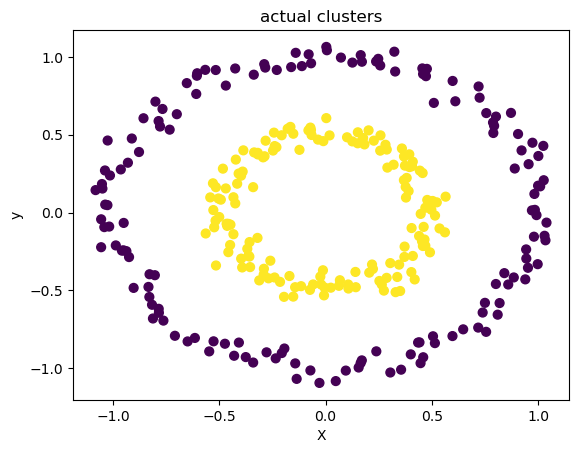

In [97]:
X_circle,y_circle = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05, random_state=random_state)
plt.scatter(X_circle[:,0], X_circle[:,1], c=y_circle,s=40)
plt.title('actual clusters')
plt.xlabel("X")
plt.ylabel("y")

In [98]:
# Number of clusters
k = 2

# actual Cluster 
y_d4 = y_circle

> # 1. K-Mean


initialize the centroids randomly:
 [[-0.067188    0.33685459]
 [ 1.00113299  0.99233602]] 



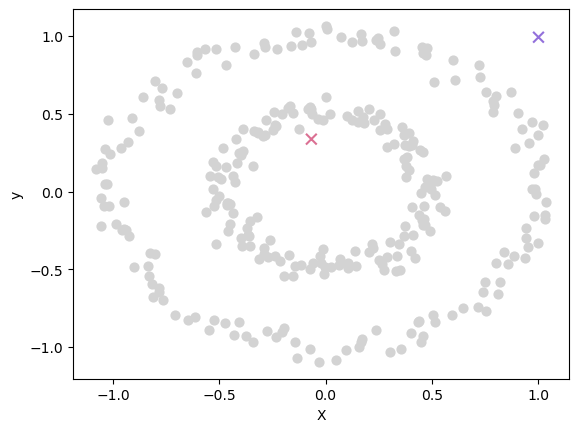


assign point to the clusters :



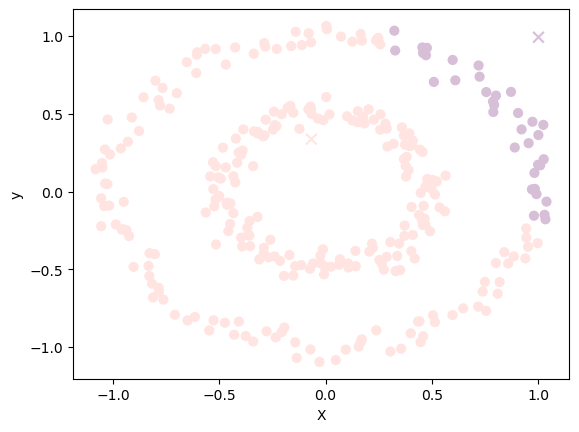

Number of iteration: 1

update the centroid :



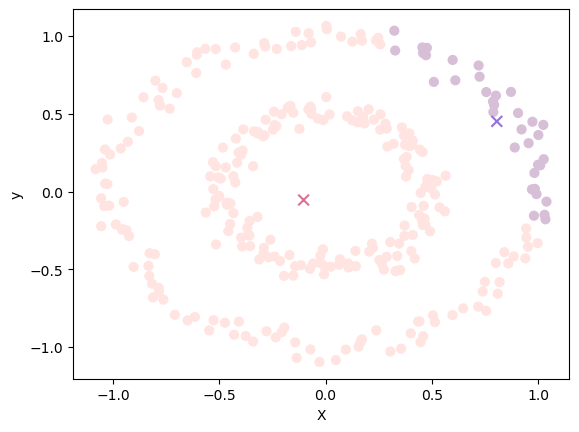


assign point to the clusters :



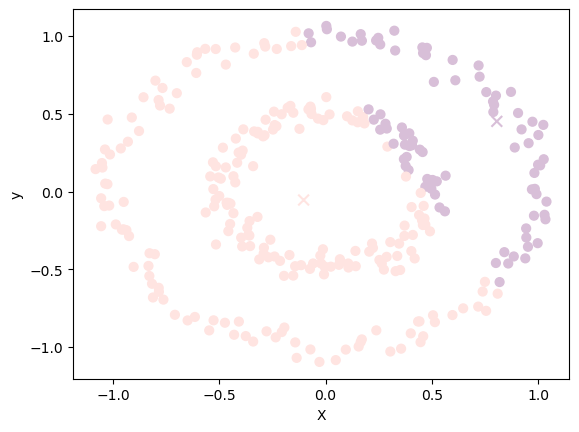

Number of iteration: 2

update the centroid :



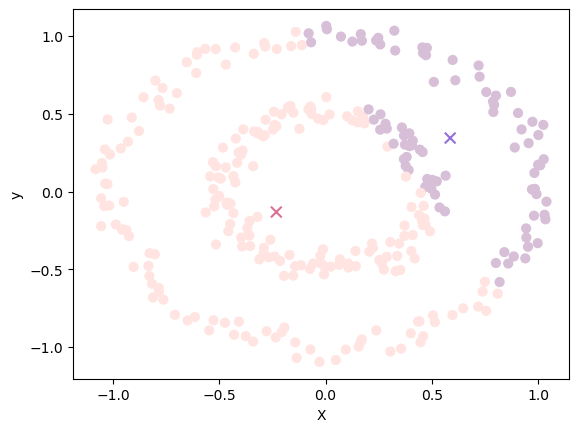


assign point to the clusters :



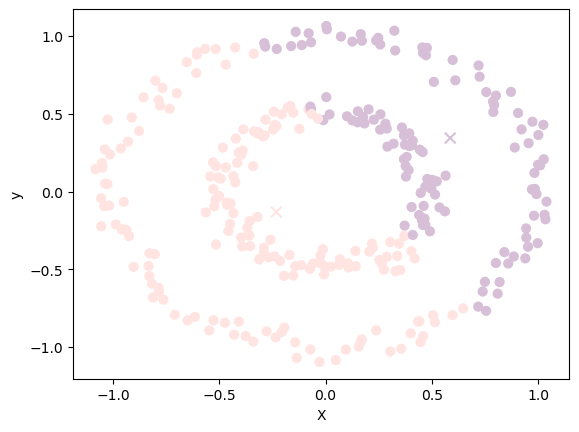

Number of iteration: 3

update the centroid :



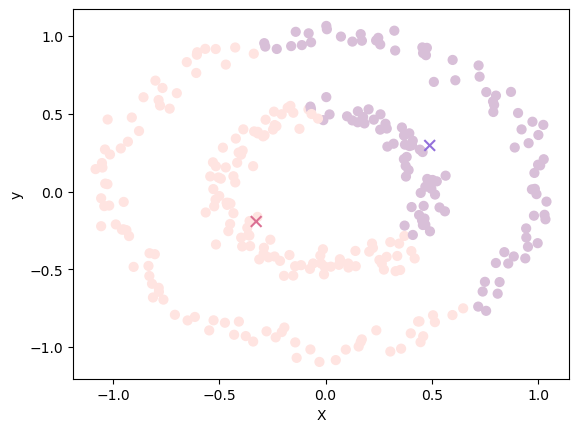


assign point to the clusters :



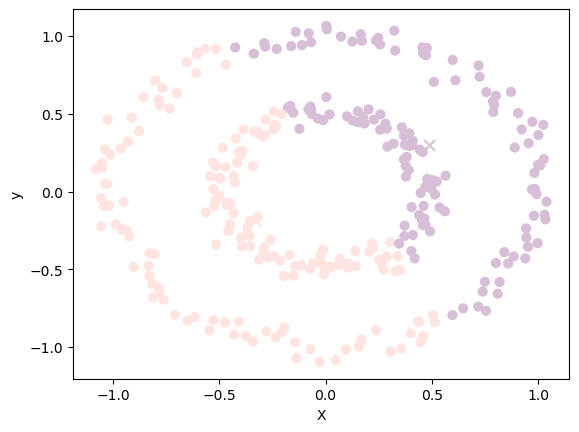

Number of iteration: 4

update the centroid :



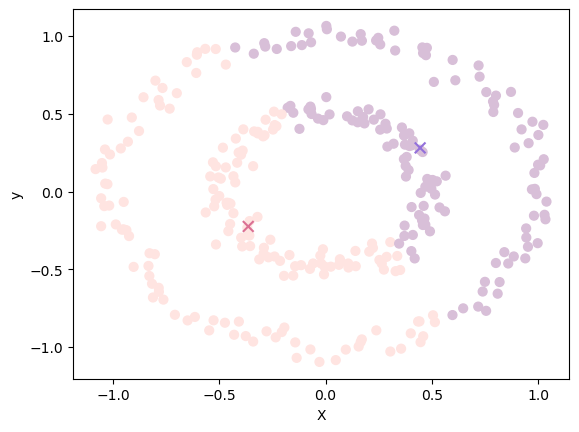


assign point to the clusters :



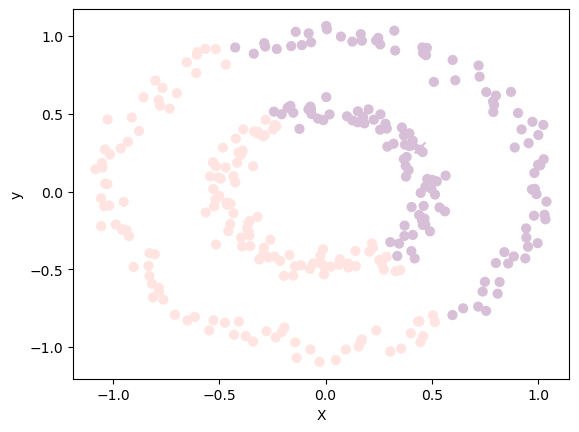

Number of iteration: 5

update the centroid :



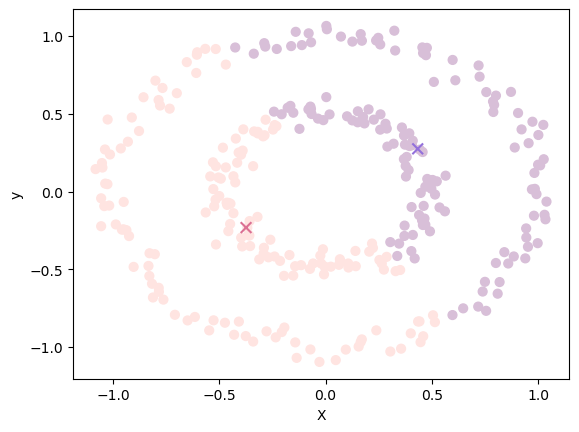


assign point to the clusters :



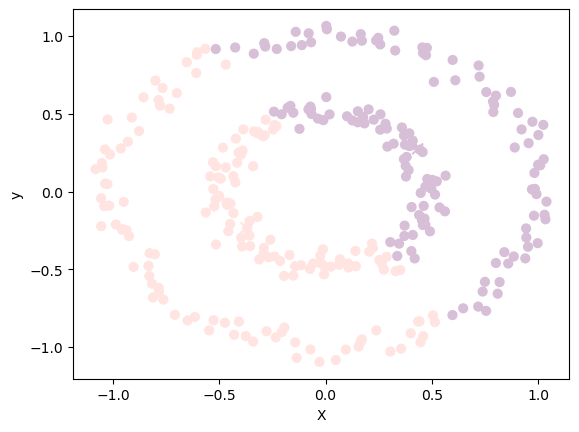

Number of iteration: 6

update the centroid :



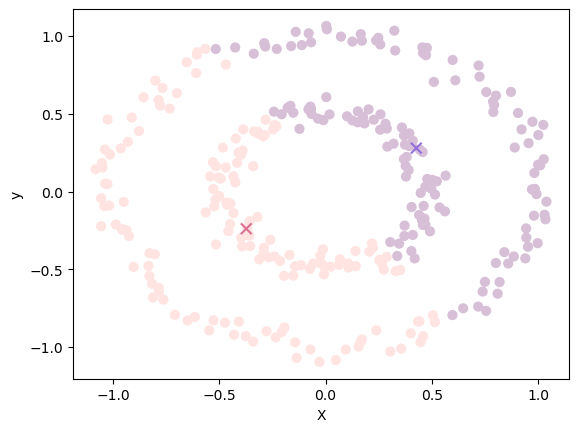


assign point to the clusters :



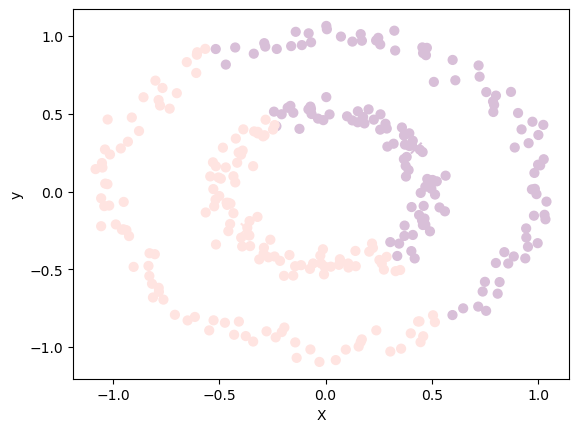

Number of iteration: 7

update the centroid :



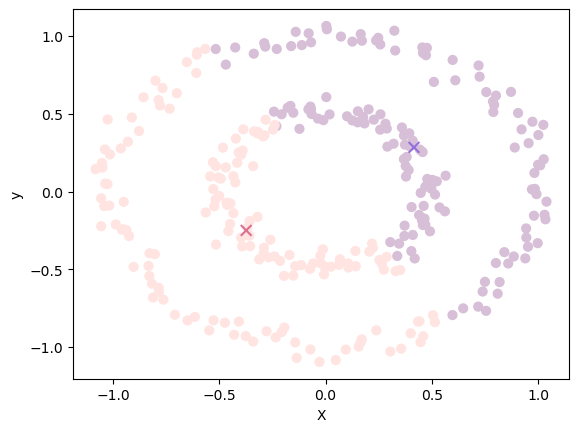


assign point to the clusters :



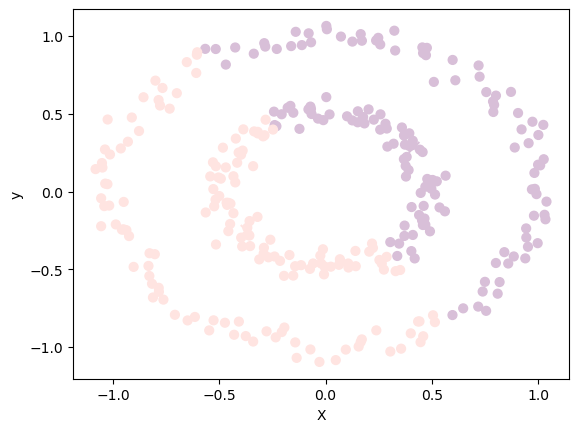

Number of iteration: 8

update the centroid :



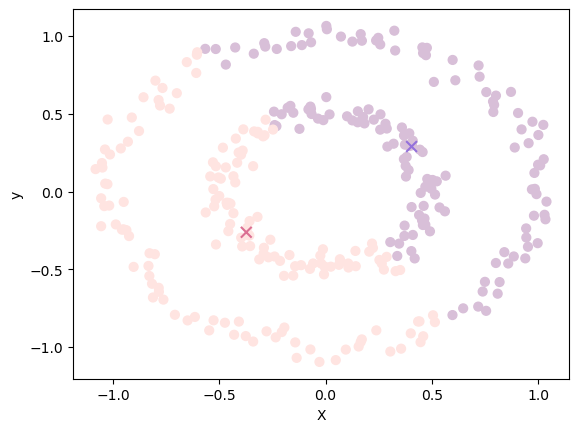


assign point to the clusters :



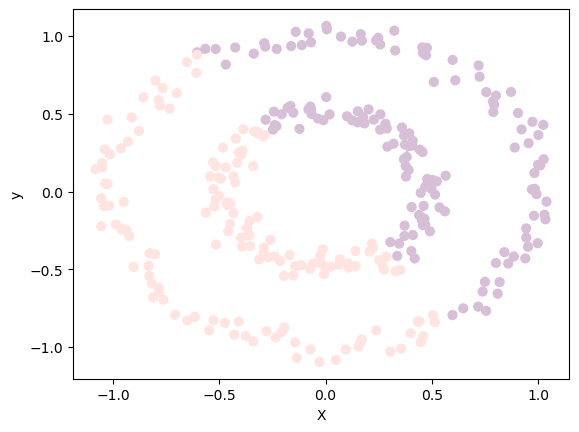

Number of iteration: 9

update the centroid :



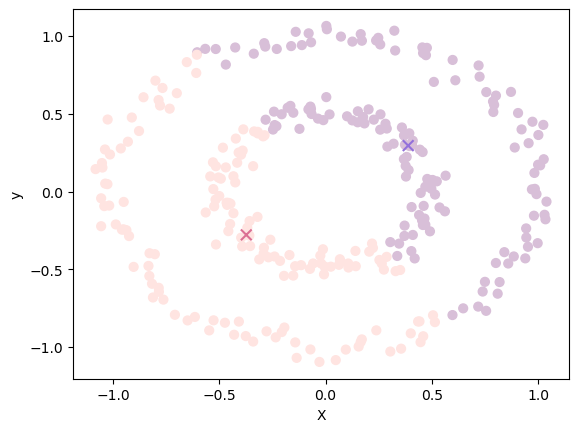


assign point to the clusters :



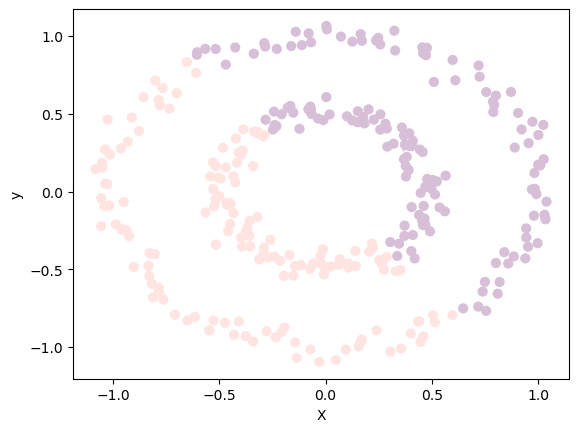


final result:



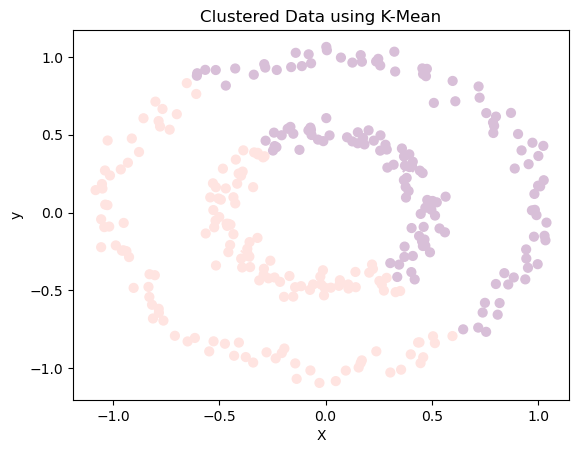

In [99]:
y_KMean_d4 = KMeans(X_circle,y_circle,k)

> # 3.4.1 The Accuracy :

> **a. F-measures**

In [100]:
FM_Kmean_d4 = f1_score(y_d4, y_KMean_d4, average='macro')
FM_Kmean_d4

0.49331081381394726

> **b. Normalized mutual information.**

In [101]:
NMI_Kmean_d4 = normalized_mutual_info_score(y_d4, y_KMean_d4)
NMI_Kmean_d4

0.00012827439057357289

> **c. Rand Statistic**

In [102]:
RS_Kmean_d4 = rand_score(y_d4, y_KMean_d4)
RS_Kmean_d4

0.4984169453734671

> # 2. DBSCAN

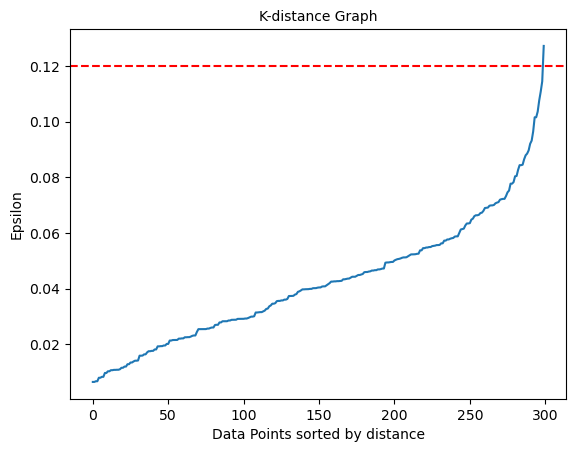

In [103]:
neighbors_D4 = NearestNeighbors(n_neighbors=20)
neighbors_fit_D4 = neighbors_D4.fit(X_circle)
distances_D4, indices = neighbors_fit_D4.kneighbors(X_circle)
distances_D4 = np.sort(distances_D4, axis=0)
distances_D4 = distances_D4[:,1]
plt.axhline(y=0.12, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=10)
plt.xlabel('Data Points sorted by distance',fontsize=10)
plt.ylabel('Epsilon',fontsize=10)
plt.plot(distances_D4)

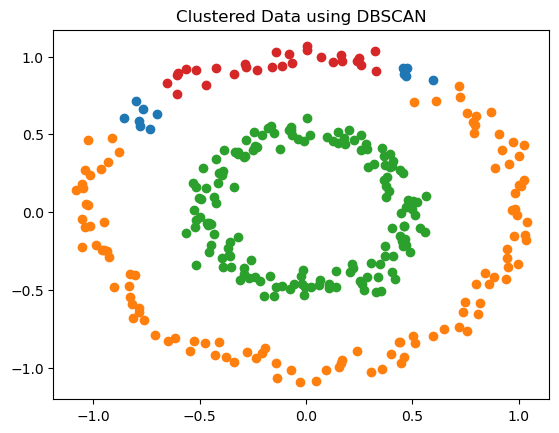

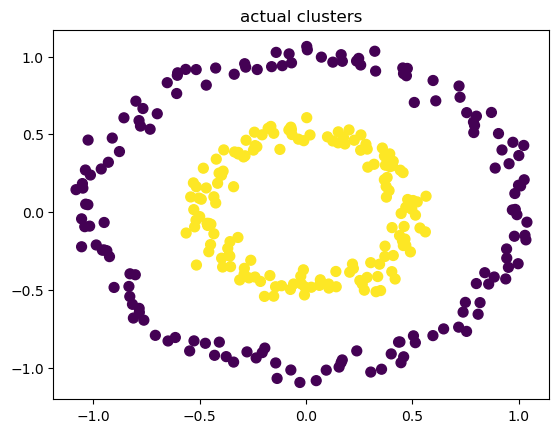

In [104]:
eps_D4 = 0.12
minPts_D4 = 5

df_circle_D4 = pd.DataFrame(X_circle, columns = ["X", "Y"] )
clusters_D4 = my_DBSCAN(eps_D4 , minPts_D4 , df_circle_D4)

cluster_df_D4 = pd.DataFrame(clusters_D4, columns = ["index", "cluster"])
cluster_df_D4[cluster_df_D4 == 3] = -1

for clust in np.unique(cluster_df_D4["cluster"]):
    x_in = X_circle[cluster_df_D4["index"][cluster_df_D4["cluster"] == clust].values, 0]
    y_in = X_circle[cluster_df_D4["index"][cluster_df_D4["cluster"] == clust].values, 1]
    plt.scatter(x_in, y_in)

plt.title('Clustered Data using DBSCAN')
plt.show() 

plt.title('actual clusters')
plt.scatter(X_circle[:, 0], X_circle[:, 1], c=y_circle, s=50)
plt.show() 

> # 3.4.2 The Accuracy :

In [105]:
y_DBSCAN_d4 = np.array(cluster_df_D4["cluster"])

> **a. F-measures**

In [106]:
FM_DBSCAN_d4 = f1_score(y_d4, y_DBSCAN_d4, average='macro')
FM_DBSCAN_d4 

0.2108974358974359

> **b. Normalized mutual information.**

In [107]:
NMI_DBSCAN_d4 = normalized_mutual_info_score(np.sort(y_d4), y_DBSCAN_d4)
NMI_DBSCAN_d4

0.4587693866652825

> **c. Rand Statistic**

In [108]:
RS_DBSCAN_d4 = rand_score(np.sort(y_d4), y_DBSCAN_d4)
RS_DBSCAN_d4

0.6981939799331104

> # 3. Hierarchical clustering

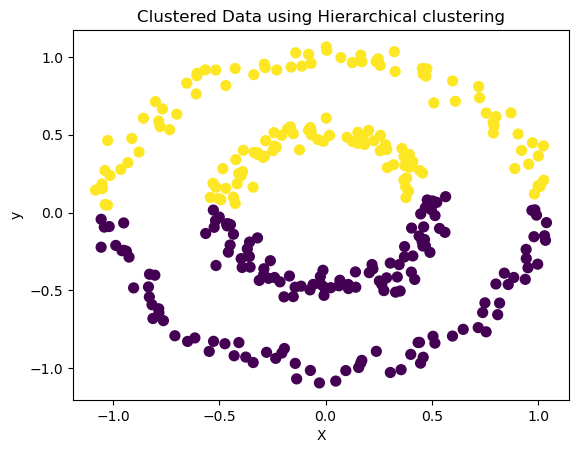

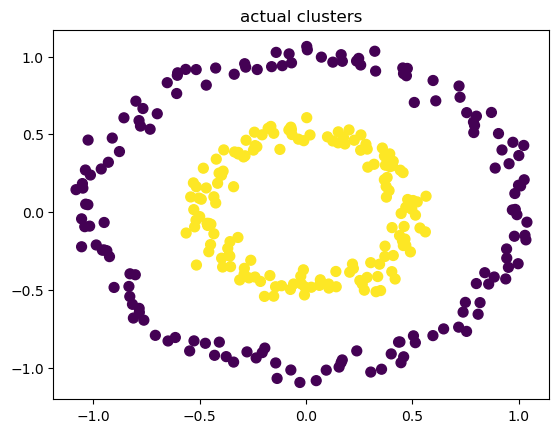

In [109]:
# impliment Hierarchical clustering from sklearn
HC_D4 = AgglomerativeClustering(n_clusters=2,  affinity='euclidean' , linkage = 'ward').fit(X_circle) # fit the data 
labels_D4 = HC_D4.labels_  # predict the labels

# plot the cluster
plt.scatter(X_circle[:,0], X_circle[:,1],c=labels_D4,s=50)
plt.title('Clustered Data using Hierarchical clustering')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

plt.title('actual clusters')
plt.scatter(X_circle[:, 0], X_circle[:, 1], c=y_circle, s=50)
plt.show() 

In [110]:
y_HC_d4 = labels_D4

> # 3.4.3 The Accuracy :

> **a. F-measures**

In [111]:
FM_HC_d4 = f1_score(y_d4, y_HC_d4, average='macro')
FM_HC_d4

0.4794215795328143

> **b. Normalized mutual information.**

In [112]:
NMI_HC_d4 = normalized_mutual_info_score(y_d4, y_HC_d4)
NMI_HC_d4

0.0011614880403448386

> **c. Rand Statistic**

In [113]:
RS_HC_d4 = rand_score(y_d4, y_HC_d4)
RS_HC_d4

0.4991304347826087

> # 4.GMM

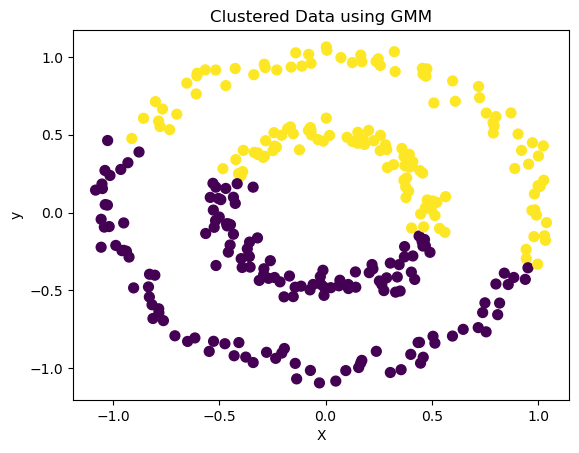

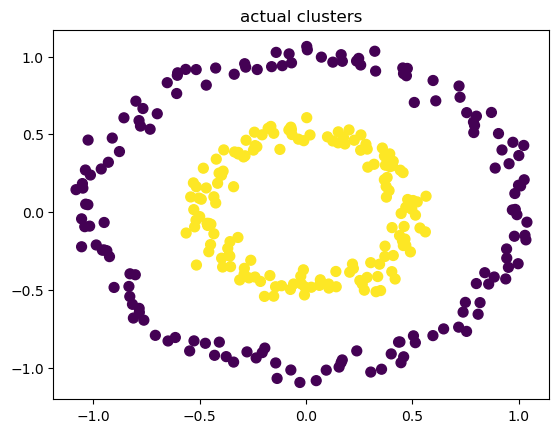

In [114]:
# impliment Gaussian Mixture Modelling from sklearn
GMM_D4 = GaussianMixture(n_components=k).fit(X_circle) # fit the data 
labels_D4_GMM = GMM_D4.predict(X_circle) # predict the labels

# plot the cluster
plt.scatter(X_circle[:,0], X_circle[:,1],c=labels_D4_GMM,s=50)
plt.title('Clustered Data using GMM')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

plt.title('actual clusters')
plt.scatter(X_circle[:, 0], X_circle[:, 1], c=y_circle, s=50)
plt.show() 

> # 3.4.4 The Accuracy :

In [115]:
y_GMM_d4 = labels_D4_GMM

> **a. F-measures**

In [116]:
FM_GMM_d4 = f1_score(y_d4, y_GMM_d4, average='macro')
FM_GMM_d4

0.49297278064401356

> **b. Normalized mutual information.**

In [117]:
NMI_GMM_d4 = normalized_mutual_info_score(y_d4, y_GMM_d4)
NMI_GMM_d4

0.00012874137588761707

> **c. Rand Statistic**

In [118]:
RS_GMM_d4 = rand_score(y_d4, y_GMM_d4)
RS_GMM_d4

0.4984169453734671

# 4. Summarize The Measures Values Dataset4:

In [119]:
print("\nSummary:")
table4 = [['K-mean',FM_Kmean_d4, NMI_Kmean_d4,RS_Kmean_d4], 
         ['Hierarchical',FM_HC_d4, NMI_HC_d4, RS_HC_d4], 
         ['DBSACN',FM_DBSCAN_d4, NMI_DBSCAN_d4, RS_DBSCAN_d4],
        ['GMM',FM_GMM_d4, NMI_GMM_d4,RS_GMM_d4]]
df_rank4 = pd.DataFrame(table4, columns=['Models', 'F-measures','NMI','Rand Statistic'])
df_rank4.set_index('Models')


Summary:


F-measures       NMI  Rand Statistic
Models                                            
K-mean          0.493311  0.000128        0.498417
Hierarchical    0.479422  0.001161        0.499130
DBSACN          0.210897  0.458769        0.698194
GMM             0.492973  0.000129        0.498417

In [120]:
print("\nRanking:")
df_rank4 = pd.DataFrame(table4, columns=['Models', 'F-measures','NMI','Rand Statistic'])
df_rank4['F-measures']=df_rank4['F-measures'].rank(ascending=False)
df_rank4['NMI']=df_rank4['NMI'].rank(ascending=False)
df_rank4['Rand Statistic']=df_rank4['Rand Statistic'].rank(ascending=False)
df_rank4['rank'] = df_rank4.mean(axis=1)
df_rank4['rank']=df_rank4['rank'].rank(ascending=True)
df_rank4=df_rank4.set_index('Models')
df_rank4


Ranking:


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


F-measures  NMI  Rand Statistic  rank
Models                                             
K-mean               1.0  4.0             3.5   3.5
Hierarchical         3.0  2.0             2.0   2.0
DBSACN               4.0  1.0             1.0   1.0
GMM                  2.0  3.0             3.5   3.5

In [121]:
data_FM4 = [['FM_Kmean_d4', FM_Kmean_d4], ['FM_DBSCAN_d4', FM_DBSCAN_d4], ['FM_HC_d4', FM_HC_d4], ['FM_GMM_d4', FM_GMM_d4]]
data_NMI4 = [['NMI_Kmean_d4', NMI_Kmean_d4], ['NMI_DBSCAN_d4', NMI_DBSCAN_d4], ['NMI_HC_d4', NMI_HC_d4], ['NMI_GMM_d4', NMI_GMM_d4]]
data_RS4 = [['RS_Kmean_d4', RS_Kmean_d4], ['RS_DBSCAN_d4', RS_DBSCAN_d4], ['RS_HC_d4', RS_HC_d4], ['RS_GMM_d4', RS_GMM_d4]]

In [122]:
df_FM4= pd.DataFrame(data_FM4, columns = ["algorathim","value"])
df_NMI4= pd.DataFrame(data_NMI4, columns = ["algorathim","value"])
df_RS4= pd.DataFrame(data_RS4, columns = ["algorathim","value"])

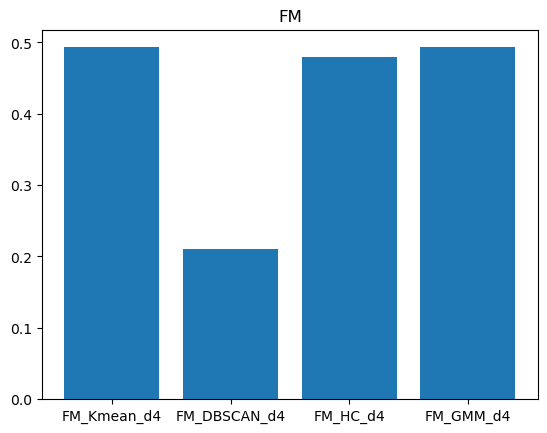

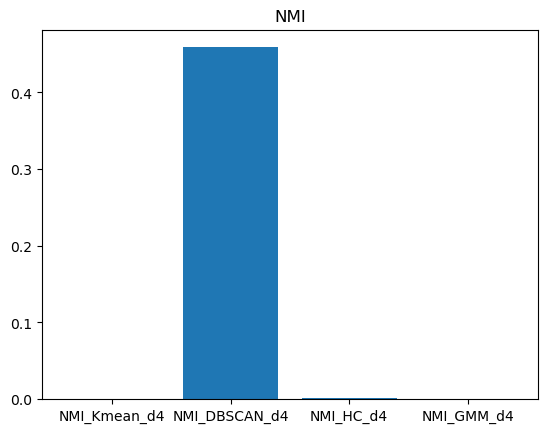

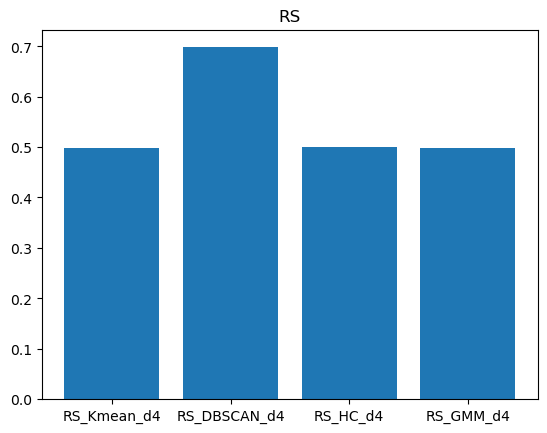

In [123]:
plt.bar(df_FM4["algorathim"], df_FM4["value"])
plt.title("FM")
plt.show() 
  
plt.bar(df_NMI4["algorathim"], df_NMI4["value"])
plt.title("NMI")
plt.show() 
  
plt.bar(df_RS4["algorathim"], df_RS4["value"])
plt.title("RS")
plt.show() 

# References:

> https://shritam.medium.com/how-dbscan-algorithm-works-2b5bef80fb3

> https://becominghuman.ai/dbscan-clustering-algorithm-implementation-from-scratch-python-9950af5eed97

> https://www.askpython.com/python/examples/k-nearest-neighbors-from-scratch

> https://towardsdatascience.com/create-your-own-k-means-clustering-algorithm-in-python-d7d4c9077670